In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Treating the columns

In [4]:
df['Month'].replace(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'],[2,3,5,10,6,7,8,11,9,12],inplace=True)
df['Revenue'] = pd.get_dummies(df['Revenue'],drop_first=True)
df['VisitorType'] = pd.get_dummies(df['VisitorType'],drop_first=True)
df['Weekend'] = pd.get_dummies(df['Weekend'],drop_first=True)

In [5]:
df.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
Month                    12330.0     7.651987     3.392841  2.0    5.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   
VisitorType              12330.0     0.006894     0.082745  0.0    0.000000   
Weekend                  12330.0     0.232603     0.422509  0.0    0.000000   
Revenue                  12330.0     0.154745     0.361676  0.0    0.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157213  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
Month                      7.000000    11.000000     12.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000  
VisitorType                0.000000     0.000000      1.000000  
Weekend                    0.000000     0.000000      1.000000  
Revenue                    0.000000     0.000000      1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.shape

(12330, 18)

In [8]:
# Visualizing the Data

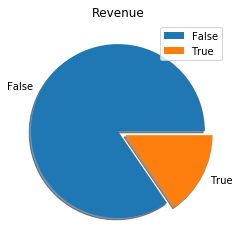

In [9]:
rev = df['Revenue'].value_counts()
rev = rev.rename({0:'False',1:'True'})
explode = (0, 0.1) 
plt.pie(rev,labels=['False','True'],explode=explode,shadow=True)
plt.title('Revenue')
plt.legend(['False','True'])
plt.show()

In [10]:
df['Administrative'] = pd.cut(df['Administrative'], bins=[0, 1, 2, 3, 4, 5, 28], right = False, 
                       include_lowest=True, labels=[0, 1, 2, 3, 4, 5])

Text(0.5, 1.0, 'Administrative')

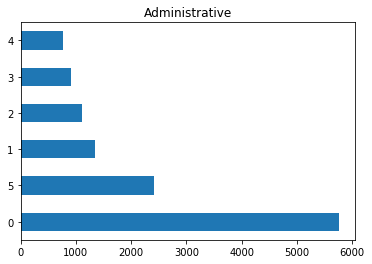

In [11]:
df['Administrative'].value_counts().plot(kind='barh')
plt.title('Administrative')

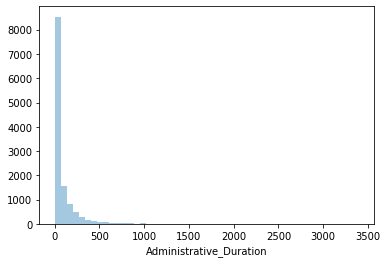

In [12]:
sns.distplot(df['Administrative_Duration'],kde=False)

In [13]:
df['Informational'] = pd.cut(df['Informational'], bins=[0, 1, 2, 3, 27], right = False, 
                       include_lowest=True, labels=[0, 1, 2, 3])

Text(0.5, 1.0, 'Informational')

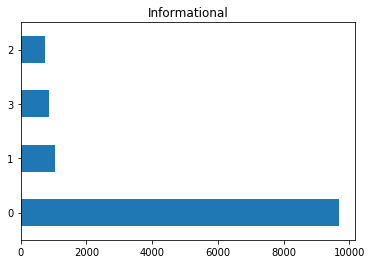

In [14]:
df['Informational'].value_counts().plot(kind='barh')
plt.title('Informational')

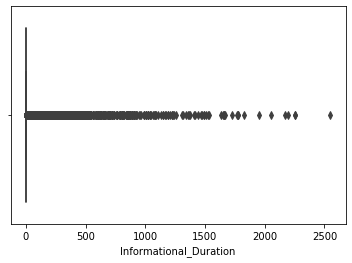

In [15]:
sns.boxplot(df['Informational_Duration'])
plt.show()

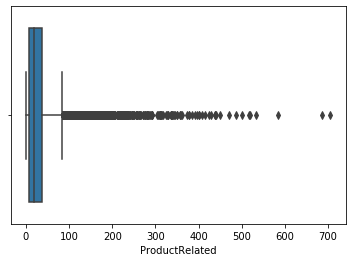

In [16]:
sns.boxplot(df['ProductRelated'])
plt.show()

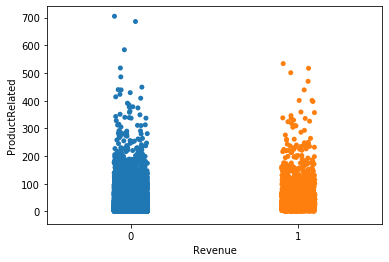

In [17]:
sns.stripplot(df.Revenue, df.ProductRelated)
plt.show()

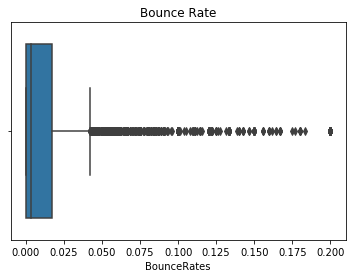

In [18]:
sns.boxplot(df['BounceRates'])
plt.title('Bounce Rate')
plt.show()

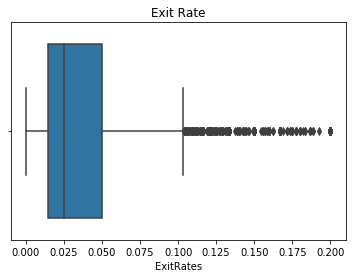

In [19]:
sns.boxplot(df['ExitRates'])
plt.title('Exit Rate')
plt.show()

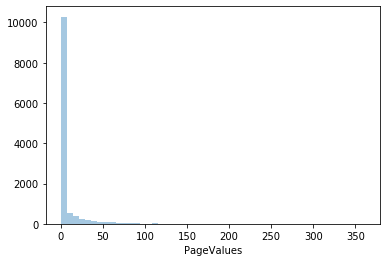

In [20]:
sns.distplot(df['PageValues'],kde=False)

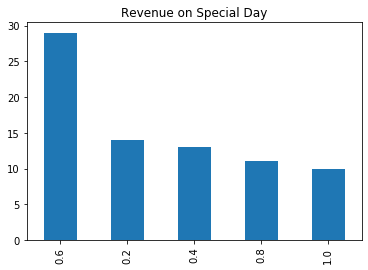

In [21]:
sd = df[df['Revenue']==1]['SpecialDay'].value_counts().drop(0).plot.bar()
plt.title('Revenue on Special Day')
plt.show()

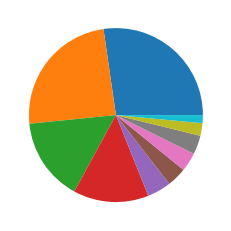

In [22]:
plt.pie(df['Month'].value_counts(),)
plt.show()

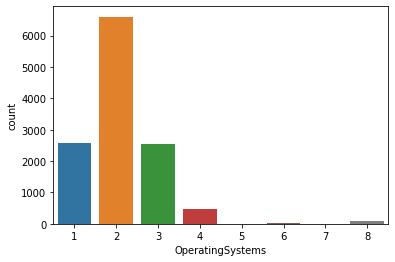

In [23]:
sns.countplot(df['OperatingSystems'])
plt.show()

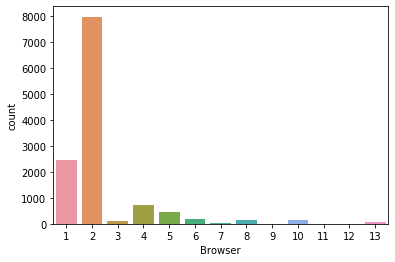

In [24]:
sns.countplot(df['Browser'])

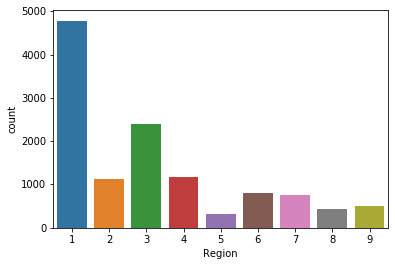

In [25]:
sns.countplot(df['Region'])

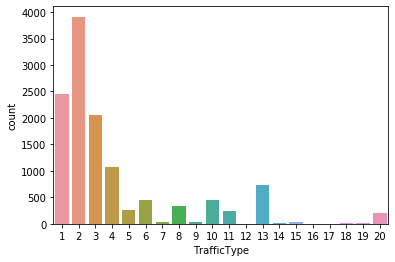

In [26]:
sns.countplot(df['TrafficType'])
plt.show()

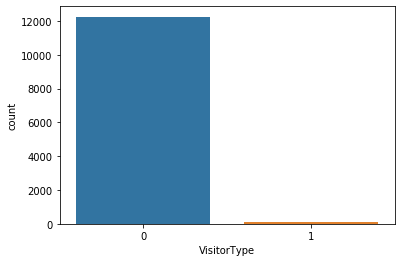

In [27]:
sns.countplot(df['VisitorType'])

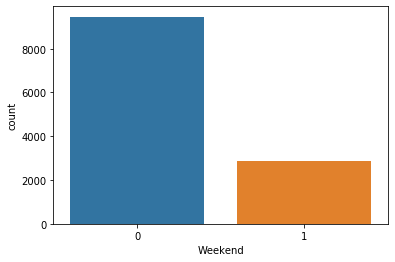

In [28]:
sns.countplot(df['Weekend'])

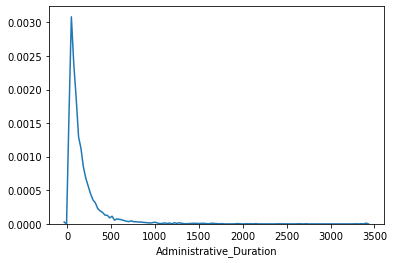

In [29]:
sns.distplot(df['Administrative_Duration'],hist=False)
plt.show()

C:\Users\Sriteja\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


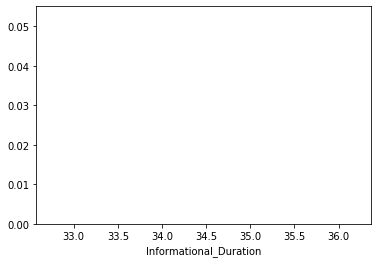

In [30]:
sns.distplot(df['Informational_Duration'],hist=False)
plt.show()

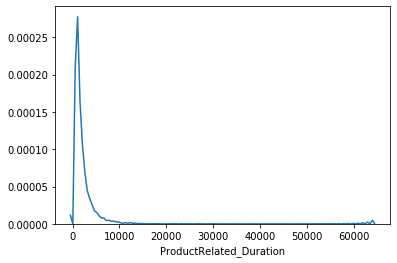

In [31]:
sns.distplot(df['ProductRelated_Duration'],hist=False)
plt.show()

In [32]:
import plotly.express as px

In [33]:
px.sunburst(df,path=['Revenue','Month','SpecialDay'])

In [34]:
zero = df[df['Revenue']==0]
px.sunburst(zero,path=['Revenue','Month','SpecialDay'])

In [35]:
one = df[df['Revenue']==1]
px.sunburst(one,path=['Revenue','Month','SpecialDay'])

In [36]:
# Transforming columns

In [37]:
cols = df[['Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration']]
for i in cols:
    df[i] = np.cbrt(df[i])

In [38]:
def make_labels(ax, boxplot,i):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]
    print(caps[1].get_ydata()[0],' is the upper whisker value in ',i,' columns.')
    print(df[df[i] > captop][i].shape[0],' values have been converted to null.')
    df[i].loc[df[i] > captop] = None

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')



11.332415342792789  is the upper whisker value in  Administrative_Duration  columns.
34  values have been converted to null.


C:\Users\Sriteja\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



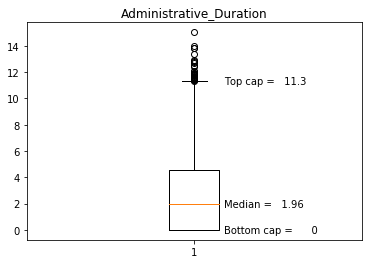

5.528774813678872  is the upper whisker value in  ProductRelated  columns.
226  values have been converted to null.


C:\Users\Sriteja\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



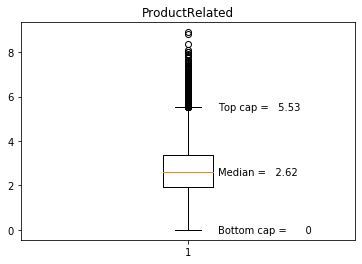

C:\Users\Sriteja\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



19.826124992148365  is the upper whisker value in  ProductRelated_Duration  columns.
168  values have been converted to null.


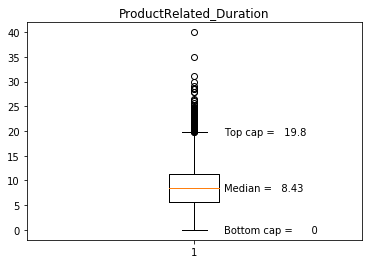

C:\Users\Sriteja\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.041945289000000004  is the upper whisker value in  BounceRates  columns.
1551  values have been converted to null.


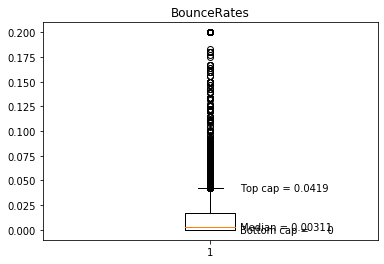

C:\Users\Sriteja\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.10333333300000001  is the upper whisker value in  ExitRates  columns.
1099  values have been converted to null.


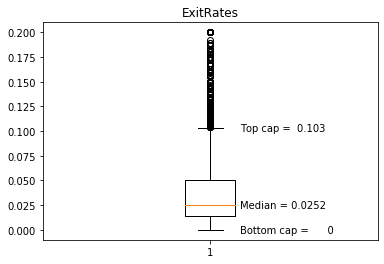

In [39]:
cols = ['Administrative_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates']
for i in cols:
    # Make the figure
    fig3, ax3 = plt.subplots()
    ax3.set_title(i)

    # Create the boxplot and store the resulting python dictionary
    my_boxes = ax3.boxplot(df[i])

    # Call the function to make labels
    make_labels(ax3, my_boxes,i)

    plt.show()

In [40]:
df.isnull().sum().sum()

3078

In [41]:
df

Administrative  Administrative_Duration Informational  \
0                  0                 0.000000             0   
1                  0                 0.000000             0   
2                  0                 0.000000             0   
3                  0                 0.000000             0   
4                  0                 0.000000             0   
...              ...                      ...           ...   
12325              3                 5.253588             0   
12326              0                 0.000000             0   
12327              0                 0.000000             0   
12328              4                 4.217163             0   
12329              0                 0.000000             0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0        1.000000                 0.000000   
1                         0.0        1.259921                 4.000000   
2                         0.0        1.000000                 0.000000   
3                         0.0        1.259921                 1.386723   
4                         0.0        2.154435                 8.561264   
...                       ...             ...                      ...   
12325                     0.0        3.756286                12.127782   
12326                     0.0        1.709976                 7.751474   
12327                     0.0        1.817121                 5.690309   
12328                     0.0        2.466212                 7.020349   
12329                     0.0        1.442250                 2.769829   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
0              NaN        NaN    0.000000         0.0      2   
1         0.000000   0.100000    0.000000         0.0      2   
2              NaN        NaN    0.000000         0.0      2   
3              NaN        NaN    0.000000         0.0      2   
4         0.020000   0.050000    0.000000         0.0      2   
...            ...        ...         ...         ...    ...   
12325     0.007143   0.029031   12.241717         0.0     12   
12326     0.000000   0.021333    0.000000         0.0     11   
12327          NaN   0.086667    0.000000         0.0     11   
12328     0.000000   0.021053    0.000000         0.0     11   
12329     0.000000   0.066667    0.000000         0.0     11   

       OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  \
0                     1        1       1            1            0        0   
1                     2        2       1            2            0        0   
2                     4        1       9            3            0        0   
3                     3        2       2            4            0        0   
4                     3        3       1            4            0        1   
...                 ...      ...     ...          ...          ...      ...   
12325                 4        6       1            1            0        1   
12326                 3        2       1            8            0        1   
12327                 3        2       1           13            0        1   
12328                 2        2       3           11            0        0   
12329                 3        2       1            2            0        1   

       Revenue  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
12325        0  
12326        0  
12327        0  
12328        0  
12329        0  

[12330 rows x 18 columns]

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [47]:
imp = IterativeImputer(max_iter=1000)
a = imp.fit(df)

In [48]:
df.isnull().sum().sum()

3078

In [49]:
imputer = IterativeImputer()
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [50]:
df

Administrative  Administrative_Duration  Informational  \
0                 0.0                 0.000000            0.0   
1                 0.0                 0.000000            0.0   
2                 0.0                 0.000000            0.0   
3                 0.0                 0.000000            0.0   
4                 0.0                 0.000000            0.0   
...               ...                      ...            ...   
12325             3.0                 5.253588            0.0   
12326             0.0                 0.000000            0.0   
12327             0.0                 0.000000            0.0   
12328             4.0                 4.217163            0.0   
12329             0.0                 0.000000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0        1.000000                 0.000000   
1                         0.0        1.259921                 4.000000   
2                         0.0        1.000000                 0.000000   
3                         0.0        1.259921                 1.386723   
4                         0.0        2.154435                 8.561264   
...                       ...             ...                      ...   
12325                     0.0        3.756286                12.127782   
12326                     0.0        1.709976                 7.751474   
12327                     0.0        1.817121                 5.690309   
12328                     0.0        2.466212                 7.020349   
12329                     0.0        1.442250                 2.769829   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
0         0.005572   0.049657    0.000000         0.0    2.0   
1         0.000000   0.100000    0.000000         0.0    2.0   
2         0.007025   0.049354    0.000000         0.0    2.0   
3         0.006799   0.048224    0.000000         0.0    2.0   
4         0.020000   0.050000    0.000000         0.0    2.0   
...            ...        ...         ...         ...    ...   
12325     0.007143   0.029031   12.241717         0.0   12.0   
12326     0.000000   0.021333    0.000000         0.0   11.0   
12327     0.019615   0.086667    0.000000         0.0   11.0   
12328     0.000000   0.021053    0.000000         0.0   11.0   
12329     0.000000   0.066667    0.000000         0.0   11.0   

       OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  \
0                   1.0      1.0     1.0          1.0          0.0      0.0   
1                   2.0      2.0     1.0          2.0          0.0      0.0   
2                   4.0      1.0     9.0          3.0          0.0      0.0   
3                   3.0      2.0     2.0          4.0          0.0      0.0   
4                   3.0      3.0     1.0          4.0          0.0      1.0   
...                 ...      ...     ...          ...          ...      ...   
12325               4.0      6.0     1.0          1.0          0.0      1.0   
12326               3.0      2.0     1.0          8.0          0.0      1.0   
12327               3.0      2.0     1.0         13.0          0.0      1.0   
12328               2.0      2.0     3.0         11.0          0.0      0.0   
12329               3.0      2.0     1.0          2.0          0.0      1.0   

       Revenue  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
12325      0.0  
12326      0.0  
12327      0.0  
12328      0.0  
12329      0.0  

[12330 rows x 18 columns]

In [51]:
cols = ['Administrative','Informational','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
for i in cols:
    df[i] = df[i].astype('category')

In [52]:
df

Administrative  Administrative_Duration Informational  \
0                0.0                 0.000000           0.0   
1                0.0                 0.000000           0.0   
2                0.0                 0.000000           0.0   
3                0.0                 0.000000           0.0   
4                0.0                 0.000000           0.0   
...              ...                      ...           ...   
12325            3.0                 5.253588           0.0   
12326            0.0                 0.000000           0.0   
12327            0.0                 0.000000           0.0   
12328            4.0                 4.217163           0.0   
12329            0.0                 0.000000           0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0        1.000000                 0.000000   
1                         0.0        1.259921                 4.000000   
2                         0.0        1.000000                 0.000000   
3                         0.0        1.259921                 1.386723   
4                         0.0        2.154435                 8.561264   
...                       ...             ...                      ...   
12325                     0.0        3.756286                12.127782   
12326                     0.0        1.709976                 7.751474   
12327                     0.0        1.817121                 5.690309   
12328                     0.0        2.466212                 7.020349   
12329                     0.0        1.442250                 2.769829   

       BounceRates  ExitRates  PageValues SpecialDay Month OperatingSystems  \
0         0.005572   0.049657    0.000000        0.0   2.0              1.0   
1         0.000000   0.100000    0.000000        0.0   2.0              2.0   
2         0.007025   0.049354    0.000000        0.0   2.0              4.0   
3         0.006799   0.048224    0.000000        0.0   2.0              3.0   
4         0.020000   0.050000    0.000000        0.0   2.0              3.0   
...            ...        ...         ...        ...   ...              ...   
12325     0.007143   0.029031   12.241717        0.0  12.0              4.0   
12326     0.000000   0.021333    0.000000        0.0  11.0              3.0   
12327     0.019615   0.086667    0.000000        0.0  11.0              3.0   
12328     0.000000   0.021053    0.000000        0.0  11.0              2.0   
12329     0.000000   0.066667    0.000000        0.0  11.0              3.0   

      Browser Region TrafficType VisitorType Weekend Revenue  
0         1.0    1.0         1.0         0.0     0.0     0.0  
1         2.0    1.0         2.0         0.0     0.0     0.0  
2         1.0    9.0         3.0         0.0     0.0     0.0  
3         2.0    2.0         4.0         0.0     0.0     0.0  
4         3.0    1.0         4.0         0.0     1.0     0.0  
...       ...    ...         ...         ...     ...     ...  
12325     6.0    1.0         1.0         0.0     1.0     0.0  
12326     2.0    1.0         8.0         0.0     1.0     0.0  
12327     2.0    1.0        13.0         0.0     1.0     0.0  
12328     2.0    3.0        11.0         0.0     0.0     0.0  
12329     2.0    1.0         2.0         0.0     1.0     0.0  

[12330 rows x 18 columns]

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
def visualize(model):
    from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
    plot_confusion_matrix(model,X_test,y_test,values_format='.1f')
    plot_roc_curve(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plt.show()
    
def evaluate(model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_squared_error,precision_score,f1_score,confusion_matrix,classification_report,recall_score,roc_auc_score
    print('Accuracy Score Train: ',accuracy_score(y_train,y_pred_train)*100,'%')
    print('Accuracy Score Test : ',accuracy_score(y_test,y_pred_test)*100,'%')
    print('*'*60)
    print('Precision Train: ',precision_score(y_train,y_pred_train)*100,'%')
    print('Precision Test : ',precision_score(y_test,y_pred_test)*100,'%')
    print('*'*60)
    print('Recall Train: ',recall_score(y_train,y_pred_train)*100,'%')
    print('Recall Test : ',recall_score(y_test,y_pred_test)*100,'%') 
    print('*'*60)
    print('F1 Train: ',f1_score(y_train,y_pred_train)*100,'%')
    print('F1 Test : ',f1_score(y_test,y_pred_test)*100,'%')   
    print('*'*60)
    print('ROC_AUC Train: ',roc_auc_score(y_train,y_pred_train)*100,'%')
    print('ROC_AUC Test : ',roc_auc_score(y_test,y_pred_test)*100,'%')   
    print('*'*60)
    print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE Test : ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    print('*'*60)
    print('Confusion Matrix Train: \n',confusion_matrix(y_train,y_pred_train))
    print('Confusion Matrix Test : \n',confusion_matrix(y_test,y_pred_test))
    print('*'*60)
    print('Classification Report Train: \n',classification_report(y_train,y_pred_train))
    print('Classification report Test : \n',classification_report(y_test,y_pred_test))

# Part 1 : Logistic Regresssion

In [54]:
df_old = pd.read_csv('Online_Shopper_Intention_WOT.csv')
df = df_old.copy()

In [55]:
#Base LR Model With Transfored Data

In [56]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000,n_jobs=-1,solver='newton-cg')
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
evaluate(model1)

Accuracy Score Train:  87.91565287915653 %
Accuracy Score Test :  88.45633955123007 %
************************************************************
Precision Train:  73.7556561085973 %
Precision Test :  71.73144876325088 %
************************************************************
Recall Train:  36.00883652430044 %
Recall Test :  36.90909090909091 %
************************************************************
F1 Train:  48.39188520534389 %
F1 Test :  48.73949579831932 %
************************************************************
ROC_AUC Train:  66.80821311984306 %
ROC_AUC Test :  67.18430093247495 %
************************************************************
RMSE Train:  0.347625475488254
RMSE Test :  0.3397596275128924
************************************************************
Confusion Matrix Train: 
 [[7099  174]
 [ 869  489]]
Confusion Matrix Test : 
 [[3069   80]
 [ 347  203]]
************************************************************
Classification Report Train: 
         

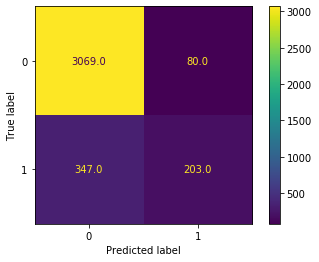

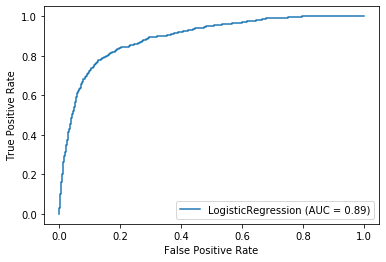

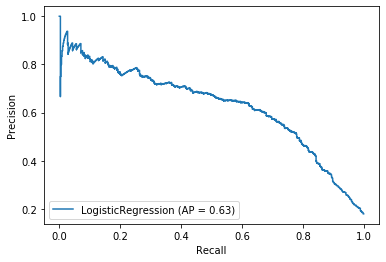

In [58]:
visualize(model1)

In [59]:
# LR + OT

In [60]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=1000,n_jobs=-1,solver='newton-cg')
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
evaluate(model2)

Accuracy Score Train:  87.95041130807554 %
Accuracy Score Test :  88.56447688564477 %
************************************************************
Precision Train:  73.66071428571429 %
Precision Test :  72.43816254416961 %
************************************************************
Recall Train:  36.45066273932253 %
Recall Test :  37.27272727272727 %
************************************************************
F1 Train:  48.76847290640395 %
F1 Test :  49.21968787515006 %
************************************************************
ROC_AUC Train:  67.0085020007626 %
ROC_AUC Test :  67.39787522734491 %
************************************************************
RMSE Train:  0.34712517471258775
RMSE Test :  0.338164503080309
************************************************************
Confusion Matrix Train: 
 [[7096  177]
 [ 863  495]]
Confusion Matrix Test : 
 [[3071   78]
 [ 345  205]]
************************************************************
Classification Report Train: 
        

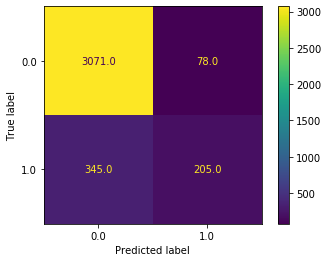

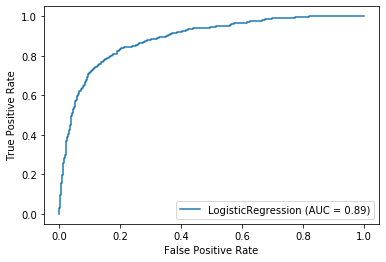

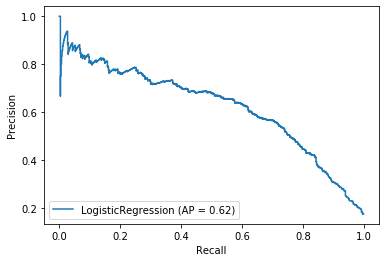

In [62]:
visualize(model2)

In [63]:
# LR + SMOTE + OT

In [64]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

In [65]:
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train))

Using TensorFlow backend.


Before
 [7273 1358]
After
 [7273 7273]


In [66]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(max_iter=1000,n_jobs=-1,solver='newton-cg')
model3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
evaluate(model3)

Accuracy Score Train:  81.4931940052248 %
Accuracy Score Test :  85.83400919167342 %
************************************************************
Precision Train:  86.1676930364756 %
Precision Test :  51.57384987893463 %
************************************************************
Recall Train:  75.03093633988726 %
Recall Test :  77.45454545454545 %
************************************************************
F1 Train:  80.21461120094077 %
F1 Test :  61.91860465116279 %
************************************************************
ROC_AUC Train:  81.4931940052248 %
ROC_AUC Test :  82.37605011692023 %
************************************************************
RMSE Train:  0.4301953741589418
RMSE Test :  0.37637734799435757
************************************************************
Confusion Matrix Train: 
 [[6397  876]
 [1816 5457]]
Confusion Matrix Test : 
 [[2749  400]
 [ 124  426]]
************************************************************
Classification Report Train: 
         

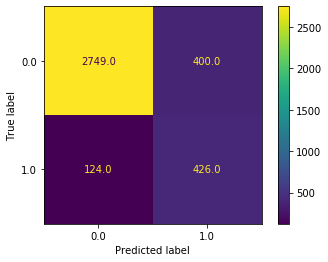

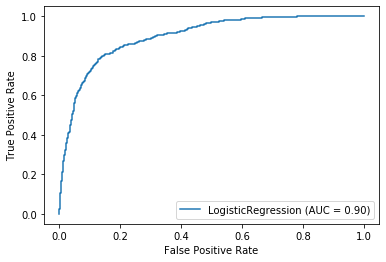

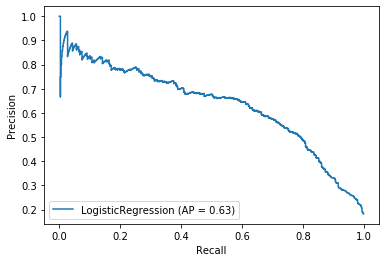

In [68]:
visualize(model3)

In [69]:
# LR + VIF + OT

In [70]:
### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)



## includes only the relevant features.
train_out.head()

Iteration no.
1
[8.343964353258738, 8.691452379871954, 5.364897104421846, 5.17350194106008, 33.18321196173075, 23.56947083219483, 2.1344998030862894, 3.9350486327858296, 1.1633922557389322, 1.2232877866622758, 6.074965620886722, 6.519552224628663, 3.1918651963109594, 2.6485628446371514, 2.162250231396192, 1.2246258612349838, 1.296054990315913]
Max VIF is for variable no.:
4
Iteration no.
2
[8.136674347102337, 8.651864793691765, 5.357360429415675, 5.17225999718749, 6.2724860626266645, 2.130109648952699, 3.9344239166815997, 1.163350421967785, 1.1995039759246469, 5.6737039161755645, 6.287727444920818, 3.164219414951542, 2.637172010608437, 2.16035185598989, 1.202480430931603, 1.293083857142282]
Max VIF is for variable no.:
1
Iteration no.
3
[2.348908282347942, 5.355772243979883, 5.1703443563075835, 6.186738430301238, 2.1300183045147225, 3.923282644379343, 1.1618203895453292, 1.1979614182560476, 5.669535324567551, 6.286834615326176, 3.164172789128151, 2.633457315454364, 2.1586946560222198, 

Administrative  Informational  Informational_Duration  BounceRates  \
0             0.0            0.0                     0.0     0.005572   
1             0.0            0.0                     0.0     0.000000   
2             0.0            0.0                     0.0     0.007025   
3             0.0            0.0                     0.0     0.006799   
4             0.0            0.0                     0.0     0.020000   

   ExitRates  PageValues  SpecialDay  Month  Browser  Region  TrafficType  \
0   0.049657         0.0         0.0    2.0      1.0     1.0          1.0   
1   0.100000         0.0         0.0    2.0      2.0     1.0          2.0   
2   0.049354         0.0         0.0    2.0      1.0     9.0          3.0   
3   0.048224         0.0         0.0    2.0      2.0     2.0          4.0   
4   0.050000         0.0         0.0    2.0      3.0     1.0          4.0   

   VisitorType  Weekend  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      1.0

In [71]:
X = train_out.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(max_iter=1000,n_jobs=-1,solver='newton-cg')
model4.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
evaluate(model4)

Accuracy Score Train:  88.04310045185957 %
Accuracy Score Test :  88.45633955123007 %
************************************************************
Precision Train:  74.77203647416414 %
Precision Test :  72.69372693726937 %
************************************************************
Recall Train:  36.22974963181149 %
Recall Test :  35.81818181818181 %
************************************************************
F1 Train:  48.80952380952381 %
F1 Test :  47.99025578562729 %
************************************************************
ROC_AUC Train:  66.97366761117593 %
ROC_AUC Test :  66.7341147261757 %
************************************************************
RMSE Train:  0.3457875004701648
RMSE Test :  0.3397596275128924
************************************************************
Confusion Matrix Train: 
 [[7107  166]
 [ 866  492]]
Confusion Matrix Test : 
 [[3075   74]
 [ 353  197]]
************************************************************
Classification Report Train: 
        

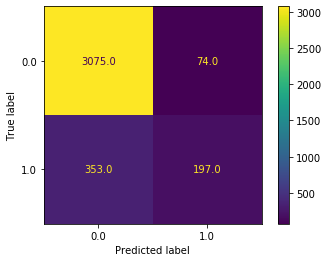

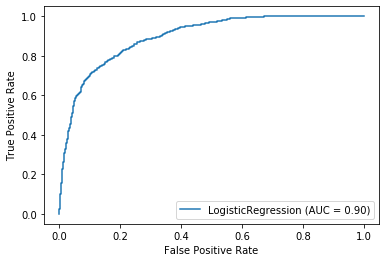

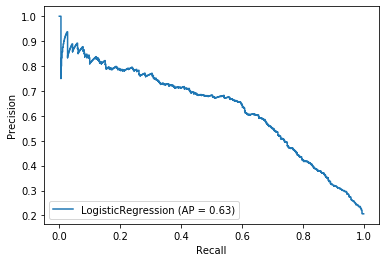

In [73]:
visualize(model4)

In [74]:
# LR + OT + RFE

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
model = LogisticRegression(max_iter=500, n_jobs=-1)
rfe = RFE(model)
model5 = rfe.fit(X_train,y_train)

In [76]:
evaluate(model5)

Accuracy Score Train:  88.1010311667246 %
Accuracy Score Test :  88.4022708840227 %
************************************************************
Precision Train:  75.03782148260211 %
Precision Test :  71.84115523465704 %
************************************************************
Recall Train:  36.52430044182621 %
Recall Test :  36.18181818181818 %
************************************************************
F1 Train:  49.13323427439326 %
F1 Test :  48.12575574365176 %
************************************************************
ROC_AUC Train:  67.12781775838044 %
ROC_AUC Test :  66.85242068189035 %
************************************************************
RMSE Train:  0.3449488198744185
RMSE Test :  0.34055438796141346
************************************************************
Confusion Matrix Train: 
 [[7108  165]
 [ 862  496]]
Confusion Matrix Test : 
 [[3071   78]
 [ 351  199]]
************************************************************
Classification Report Train: 
        

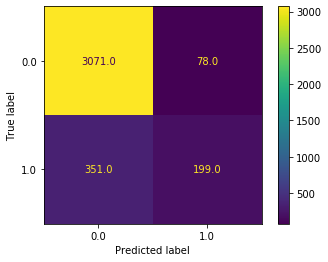

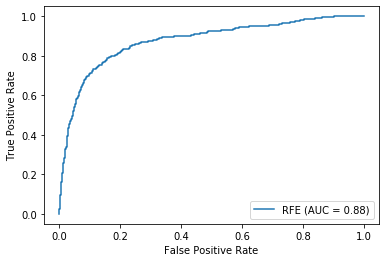

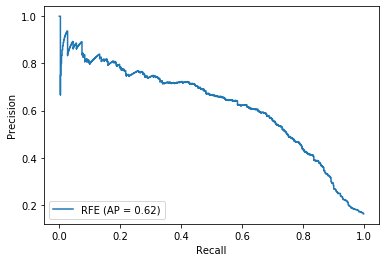

In [77]:
visualize(model5)

In [78]:
# LR + OT + RFE + SMOTE

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
model = LogisticRegression(max_iter=500, n_jobs=-1)
rfe = RFE(model)
model6 = rfe.fit(X_train,y_train)

In [85]:
evaluate(model6)

Accuracy Score Train:  81.99505018561804 %
Accuracy Score Test :  85.61773452284402 %
************************************************************
Precision Train:  86.79633143580013 %
Precision Test :  51.08695652173913 %
************************************************************
Recall Train:  75.47091984050599 %
Recall Test :  76.9090909090909 %
************************************************************
F1 Train:  80.73839817606824 %
F1 Test :  61.39332365747461 %
************************************************************
ROC_AUC Train:  81.99505018561804 %
ROC_AUC Test :  82.02393256156354 %
************************************************************
RMSE Train:  0.42432239882407763
RMSE Test :  0.3792395743742468
************************************************************
Confusion Matrix Train: 
 [[6438  835]
 [1784 5489]]
Confusion Matrix Test : 
 [[2744  405]
 [ 127  423]]
************************************************************
Classification Report Train: 
       

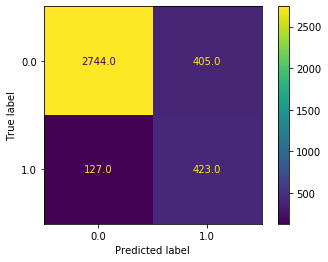

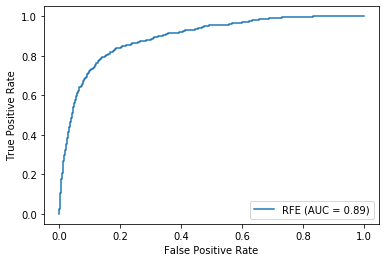

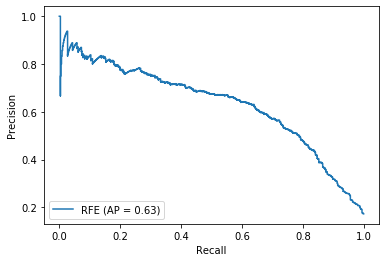

In [86]:
visualize(model6)

In [87]:
# LR_CV + OT + RFE + SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = LogisticRegressionCV(max_iter=1000, n_jobs=-1)
rfe = RFE(model)
model7 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149  550]


In [88]:
evaluate(model7)

Accuracy Score Train:  81.85068059947753 %
Accuracy Score Test :  86.61800486618006 %
************************************************************
Precision Train:  87.84512334585852 %
Precision Test :  53.59477124183007 %
************************************************************
Recall Train:  73.93097758834044 %
Recall Test :  74.54545454545455 %
************************************************************
F1 Train:  80.28968194714052 %
F1 Test :  62.3574144486692 %
************************************************************
ROC_AUC Train:  81.85068059947753 %
ROC_AUC Test :  81.63601720603944 %
************************************************************
RMSE Train:  0.4260201802793206
RMSE Test :  0.36581409395784564
************************************************************
Confusion Matrix Train: 
 [[6529  744]
 [1896 5377]]
Confusion Matrix Test : 
 [[2794  355]
 [ 140  410]]
************************************************************
Classification Report Train: 
       

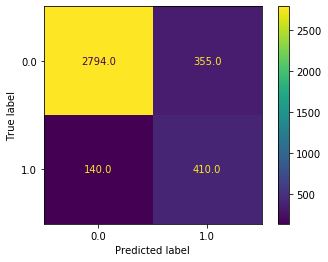

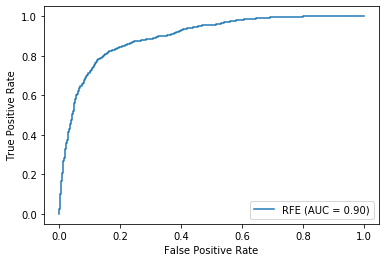

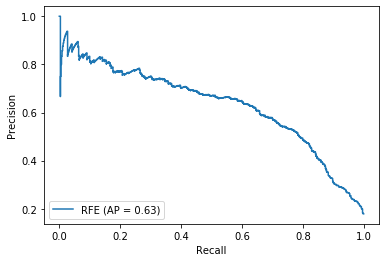

In [89]:
visualize(model7)

In [90]:
# LR + PCA + OT + SMOTE

In [91]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = LogisticRegression(max_iter=500, n_jobs=-1)
pca = PCA(model)
model8 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149  550]


In [92]:
evaluate(model8)

Accuracy Score Train:  81.788807919703 %
Accuracy Score Test :  86.6720735333874 %
************************************************************
Precision Train:  87.85199738048462 %
Precision Test :  53.71577574967405 %
************************************************************
Recall Train:  73.77973326000274 %
Recall Test :  74.90909090909092 %
************************************************************
F1 Train:  80.2032732979598 %
F1 Test :  62.566438876233875 %
************************************************************
ROC_AUC Train:  81.78880791970302 %
ROC_AUC Test :  81.81783538785761 %
************************************************************
RMSE Train:  0.4267457331983179
RMSE Test :  0.36507432759114405
************************************************************
Confusion Matrix Train: 
 [[6531  742]
 [1907 5366]]
Confusion Matrix Test : 
 [[2794  355]
 [ 138  412]]
************************************************************
Classification Report Train: 
         

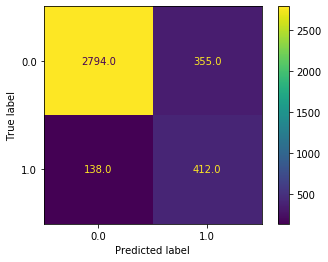

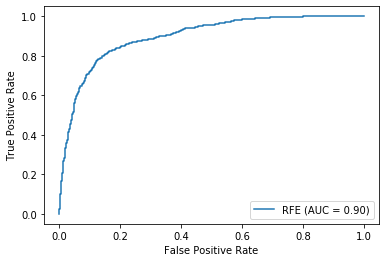

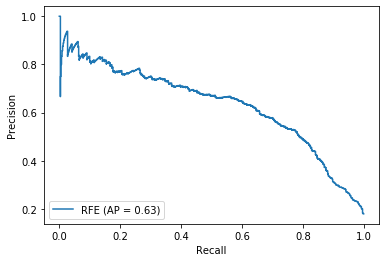

In [93]:
visualize(model8)

In [94]:
# LR + Hyperparameter Tuning + OT

In [95]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model9 = LogisticRegression(max_iter=1000,n_jobs=-1,solver='newton-cg')
model9.fit(X_train,y_train)
lr_cv = GridSearchCV(model9, scoring='recall',cv=5,param_grid={
            'C': [0.1, 1, 100, 1000]
        })
model9 = lr_cv.fit(X_train,y_train)

In [96]:
evaluate(model9)

Accuracy Score Train:  88.1010311667246 %
Accuracy Score Test :  88.64557988645579 %
************************************************************
Precision Train:  74.59138187221397 %
Precision Test :  73.04964539007092 %
************************************************************
Recall Train:  36.96612665684831 %
Recall Test :  37.45454545454546 %
************************************************************
F1 Train:  49.43377646479567 %
F1 Test :  49.519230769230774 %
************************************************************
ROC_AUC Train:  67.3074824127085 %
ROC_AUC Test :  67.52054043130575 %
************************************************************
RMSE Train:  0.3449488198744185
RMSE Test :  0.3369632044236314
************************************************************
Confusion Matrix Train: 
 [[7102  171]
 [ 856  502]]
Confusion Matrix Test : 
 [[3073   76]
 [ 344  206]]
************************************************************
Classification Report Train: 
        

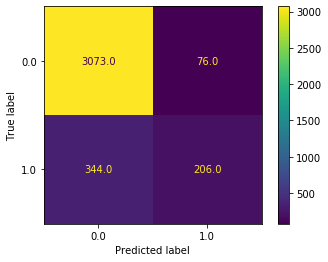

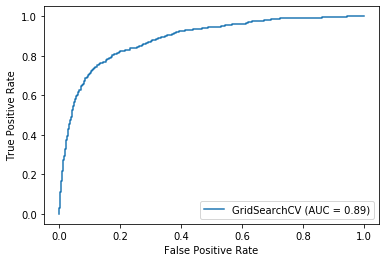

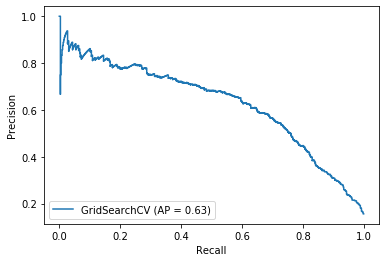

In [97]:
visualize(model9)

# Random Forest Classifier

In [98]:
# RF (Base Model)

In [99]:
df_old = pd.read_csv('Online_Shopper_Intention_WOT.csv')
df = df_old.copy()

In [100]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [101]:
evaluate(model1)

Accuracy Score Train:  91.84335534700499 %
Accuracy Score Test :  90.07839956745066 %
************************************************************
Precision Train:  79.78142076502732 %
Precision Test :  70.84282460136674 %
************************************************************
Recall Train:  64.50662739322533 %
Recall Test :  56.54545454545455 %
************************************************************
F1 Train:  71.3355048859935 %
F1 Test :  62.89180990899899 %
************************************************************
ROC_AUC Train:  80.72712092884146 %
ROC_AUC Test :  76.24033603741448 %
************************************************************
RMSE Train:  0.2855984007832505
RMSE Test :  0.3149857208279343
************************************************************
Confusion Matrix Train: 
 [[7051  222]
 [ 482  876]]
Confusion Matrix Test : 
 [[3021  128]
 [ 239  311]]
************************************************************
Classification Report Train: 
        

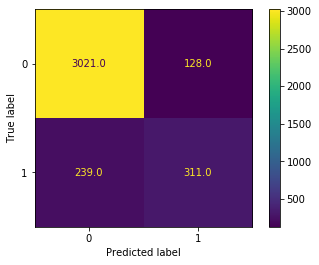

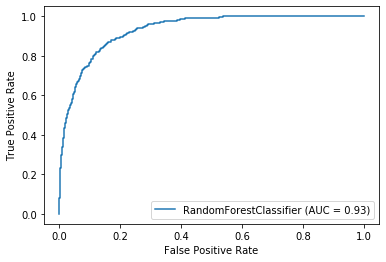

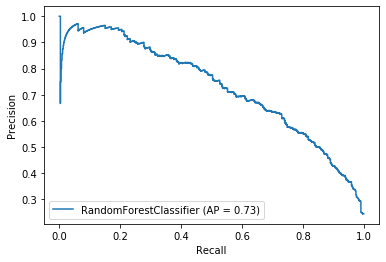

In [102]:
visualize(model1)

In [103]:
# RF + OT

In [104]:
df_old = pd.read_csv('Online_Shopper_Intention_OT.csv')
df_old.drop('Unnamed: 0',axis=1,inplace=True)
df = df_old.copy()

In [105]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
evaluate(model2)

Accuracy Score Train:  91.68114934538292 %
Accuracy Score Test :  90.05136523384698 %
************************************************************
Precision Train:  78.98550724637681 %
Precision Test :  70.96774193548387 %
************************************************************
Recall Train:  64.2120765832106 %
Recall Test :  56.00000000000001 %
************************************************************
F1 Train:  70.83671811535338 %
F1 Test :  62.601626016260155 %
************************************************************
ROC_AUC Train:  80.51109810186242 %
ROC_AUC Test :  75.99936487773896 %
************************************************************
RMSE Train:  0.28842417815809196
RMSE Test :  0.3154145647580817
************************************************************
Confusion Matrix Train: 
 [[7041  232]
 [ 486  872]]
Confusion Matrix Test : 
 [[3023  126]
 [ 242  308]]
************************************************************
Classification Report Train: 
      

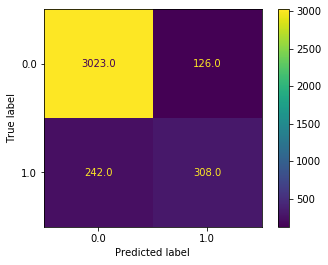

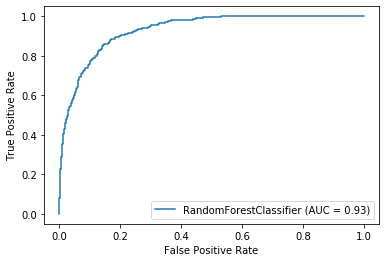

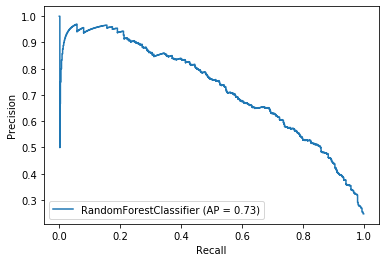

In [107]:
visualize(model2)

In [108]:
# RF + RFE + OT

In [109]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
model = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
rfe = RFE(model)
model3 = rfe.fit(X_train,y_train)

In [110]:
evaluate(model3)

Accuracy Score Train:  91.69273548835592 %
Accuracy Score Test :  90.07839956745066 %
************************************************************
Precision Train:  78.89990982867448 %
Precision Test :  71.03448275862068 %
************************************************************
Recall Train:  64.43298969072166 %
Recall Test :  56.18181818181818 %
************************************************************
F1 Train:  70.93635995135793 %
F1 Test :  62.74111675126902 %
************************************************************
ROC_AUC Train:  80.6078051712236 %
ROC_AUC Test :  76.09027396864805 %
************************************************************
RMSE Train:  0.2882232556828833
RMSE Test :  0.3149857208279343
************************************************************
Confusion Matrix Train: 
 [[7039  234]
 [ 483  875]]
Confusion Matrix Test : 
 [[3023  126]
 [ 241  309]]
************************************************************
Classification Report Train: 
        

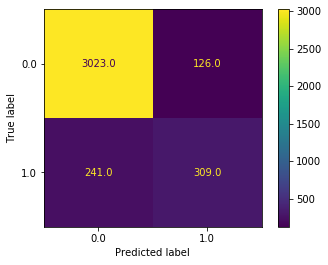

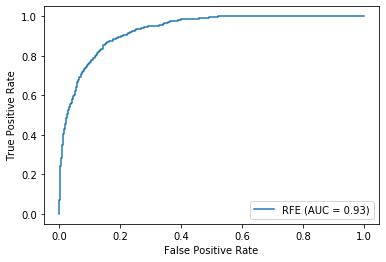

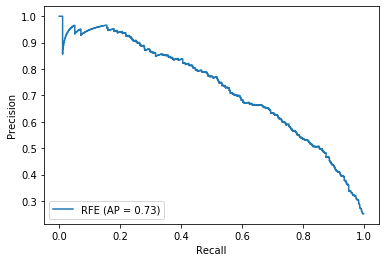

In [111]:
visualize(model3)

In [112]:
# RF + VIF + OT

### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)



## includes only the relevant features.
train_out.head()

Iteration no.
1
[8.343964353258738, 8.691452379871954, 5.364897104421846, 5.17350194106008, 33.18321196173075, 23.56947083219483, 2.1344998030862894, 3.9350486327858296, 1.1633922557389322, 1.2232877866622758, 6.074965620886722, 6.519552224628663, 3.1918651963109594, 2.6485628446371514, 2.162250231396192, 1.2246258612349838, 1.296054990315913]
Max VIF is for variable no.:
4
Iteration no.
2
[8.136674347102337, 8.651864793691765, 5.357360429415675, 5.17225999718749, 6.2724860626266645, 2.130109648952699, 3.9344239166815997, 1.163350421967785, 1.1995039759246469, 5.6737039161755645, 6.287727444920818, 3.164219414951542, 2.637172010608437, 2.16035185598989, 1.202480430931603, 1.293083857142282]
Max VIF is for variable no.:
1
Iteration no.
3
[2.348908282347942, 5.355772243979883, 5.1703443563075835, 6.186738430301238, 2.1300183045147225, 3.923282644379343, 1.1618203895453292, 1.1979614182560476, 5.669535324567551, 6.286834615326176, 3.164172789128151, 2.633457315454364, 2.1586946560222198, 

Administrative  Informational  Informational_Duration  BounceRates  \
0             0.0            0.0                     0.0     0.005572   
1             0.0            0.0                     0.0     0.000000   
2             0.0            0.0                     0.0     0.007025   
3             0.0            0.0                     0.0     0.006799   
4             0.0            0.0                     0.0     0.020000   

   ExitRates  PageValues  SpecialDay  Month  Browser  Region  TrafficType  \
0   0.049657         0.0         0.0    2.0      1.0     1.0          1.0   
1   0.100000         0.0         0.0    2.0      2.0     1.0          2.0   
2   0.049354         0.0         0.0    2.0      1.0     9.0          3.0   
3   0.048224         0.0         0.0    2.0      2.0     2.0          4.0   
4   0.050000         0.0         0.0    2.0      3.0     1.0          4.0   

   VisitorType  Weekend  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      1.0

Accuracy Score Train:  91.39149577105782 %
Accuracy Score Test :  89.9161935658286 %
************************************************************
Precision Train:  77.67776777677767 %
Precision Test :  70.06802721088435 %
************************************************************
Recall Train:  63.54933726067746 %
Recall Test :  56.18181818181818 %
************************************************************
F1 Train:  69.90684487646821 %
F1 Test :  62.36125126135218 %
************************************************************
ROC_AUC Train:  80.06973256544117 %
ROC_AUC Test :  75.99500562949277 %
************************************************************
RMSE Train:  0.2934025260447187
RMSE Test :  0.3175500973731767
************************************************************
Confusion Matrix Train: 
 [[7025  248]
 [ 495  863]]
Confusion Matrix Test : 
 [[3017  132]
 [ 241  309]]
************************************************************
Classification Report Train: 
        

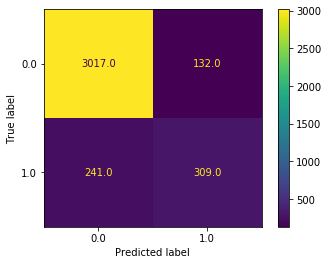

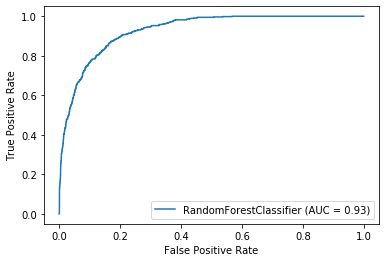

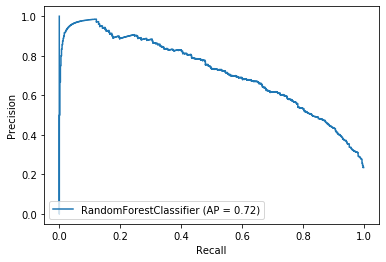

In [113]:
X = train_out.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model4.fit(X_train,y_train)

evaluate(model4)

visualize(model4)

In [114]:
# RF + OT + RFE + SMOTE

In [115]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = -1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
rfe = RFE(model)
model5 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149  550]


In [116]:
evaluate(model5)

Accuracy Score Train:  92.27966451258078 %
Accuracy Score Test :  88.13192754798594 %
************************************************************
Precision Train:  91.31953775866702 %
Precision Test :  57.37051792828686 %
************************************************************
Recall Train:  93.44149594390211 %
Recall Test :  78.54545454545455 %
************************************************************
F1 Train:  92.36833163438668 %
F1 Test :  66.30851880276285 %
************************************************************
ROC_AUC Train:  92.27966451258077 %
ROC_AUC Test :  84.1758711279194 %
************************************************************
RMSE Train:  0.277854916951621
RMSE Test :  0.3445006887077885
************************************************************
Confusion Matrix Train: 
 [[6627  646]
 [ 477 6796]]
Confusion Matrix Test : 
 [[2828  321]
 [ 118  432]]
************************************************************
Classification Report Train: 
         

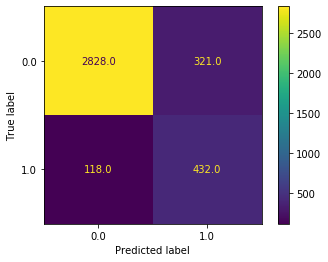

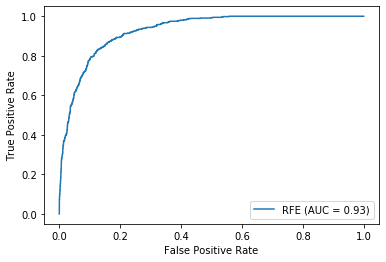

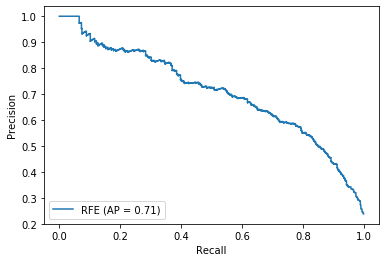

In [117]:
visualize(model5)

In [118]:
# RF + SMOTE + OT

In [119]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

In [120]:
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train))

Before
 [7273 1358]
After
 [7273 7273]


In [121]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = -1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model6.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [122]:
evaluate(model6)

Accuracy Score Train:  92.75402172418535 %
Accuracy Score Test :  88.294133549608 %
************************************************************
Precision Train:  91.92395847377645 %
Precision Test :  58.09128630705395 %
************************************************************
Recall Train:  93.74398460057748 %
Recall Test :  76.36363636363637 %
************************************************************
F1 Train:  92.82505105513957 %
F1 Test :  65.98586017282011 %
************************************************************
ROC_AUC Train:  92.75402172418534 %
ROC_AUC Test :  83.37076705447618 %
************************************************************
RMSE Train:  0.2691835484537392
RMSE Test :  0.342138370405776
************************************************************
Confusion Matrix Train: 
 [[6674  599]
 [ 455 6818]]
Confusion Matrix Test : 
 [[2846  303]
 [ 130  420]]
************************************************************
Classification Report Train: 
          

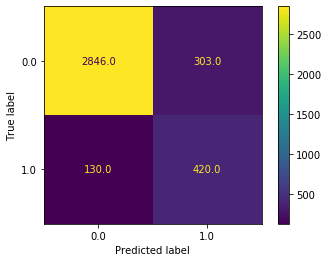

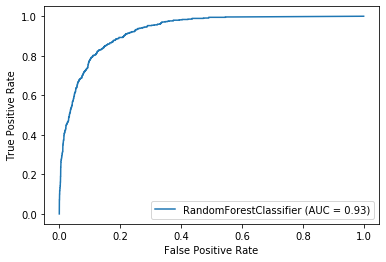

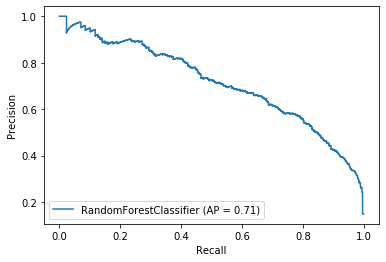

In [123]:
visualize(model6)

In [124]:
# RF + PCA + OT + SMOTE

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = -1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
pca = PCA(model)
model8 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149  550]


In [125]:
evaluate(model8)

Accuracy Score Train:  92.14216966863744 %
Accuracy Score Test :  88.13192754798594 %
************************************************************
Precision Train:  91.28502155172413 %
Precision Test :  57.39014647137151 %
************************************************************
Recall Train:  93.18025574040973 %
Recall Test :  78.36363636363637 %
************************************************************
F1 Train:  92.22290263319046 %
F1 Test :  66.25672559569563 %
************************************************************
ROC_AUC Train:  92.14216966863742 %
ROC_AUC Test :  84.10084009353619 %
************************************************************
RMSE Train:  0.2803182179481486
RMSE Test :  0.3445006887077885
************************************************************
Confusion Matrix Train: 
 [[6626  647]
 [ 496 6777]]
Confusion Matrix Test : 
 [[2829  320]
 [ 119  431]]
************************************************************
Classification Report Train: 
       

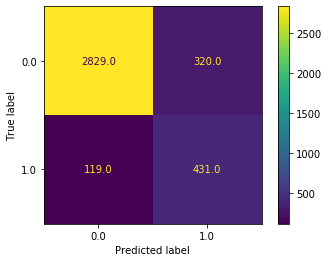

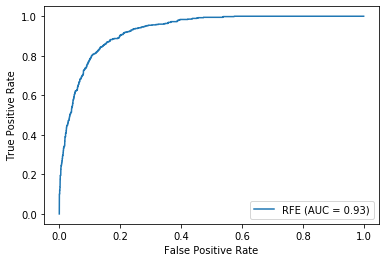

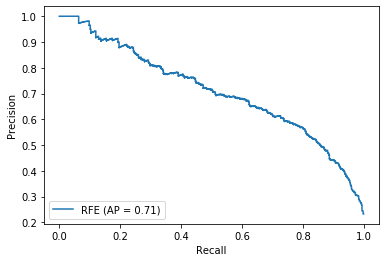

In [126]:
visualize(model8)

In [127]:
# RF + SMote + OT + HyperParameterTuning

In [128]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model9 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model4 = model9.fit(X_train,y_train)

In [129]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {}  
  
GS_svm = GridSearchCV(model4, param_grid, refit = True, verbose = 3,cv=3,scoring='roc_auc') 
  
# fitting the model for grid search 
GS_svm.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.924, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... , score=0.931, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .................................... , score=0.934, total=   0.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=30,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=70, n_jobs=1,
                                              oob_score=True, random_state=42,
                                        

# Part 3: KNN Classifier

In [130]:
# KNN (Base Model)

In [131]:
df_old = pd.read_csv('Online_Shopper_Intention_WOT.csv')
df = df_old.copy()

In [132]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [133]:
evaluate(model1)

Accuracy Score Train:  90.12860618700034 %
Accuracy Score Test :  87.86158421194918 %
************************************************************
Precision Train:  83.02872062663185 %
Precision Test :  68.63468634686348 %
************************************************************
Recall Train:  46.833578792341676 %
Recall Test :  33.81818181818182 %
************************************************************
F1 Train:  59.887005649717516 %
F1 Test :  45.31059683313033 %
************************************************************
ROC_AUC Train:  72.52307291053906 %
ROC_AUC Test :  65.559456104391 %
************************************************************
RMSE Train:  0.31418774344330574
RMSE Test :  0.34840229316195415
************************************************************
Confusion Matrix Train: 
 [[7143  130]
 [ 722  636]]
Confusion Matrix Test : 
 [[3064   85]
 [ 364  186]]
************************************************************
Classification Report Train: 
     

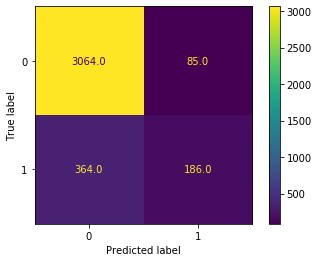

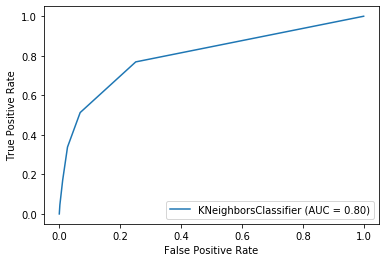

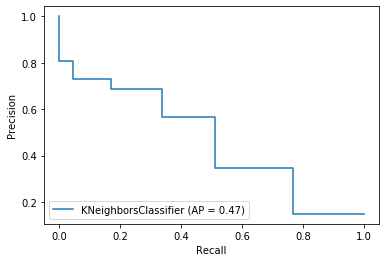

In [134]:
visualize(model1)

In [135]:
# KNN + OT

In [136]:
df_old = pd.read_csv('Online_Shopper_Intention_OT.csv')
df_old.drop('Unnamed: 0',axis=1,inplace=True)
df = df_old.copy()

In [137]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [138]:
evaluate(model2)

Accuracy Score Train:  91.75066620322094 %
Accuracy Score Test :  88.4022708840227 %
************************************************************
Precision Train:  77.9896013864818 %
Precision Test :  63.06695464362851 %
************************************************************
Recall Train:  66.27393225331369 %
Recall Test :  53.090909090909086 %
************************************************************
F1 Train:  71.65605095541402 %
F1 Test :  57.650542941757166 %
************************************************************
ROC_AUC Train:  81.39078160857626 %
ROC_AUC Test :  73.83030687952885 %
************************************************************
RMSE Train:  0.28721653498326055
RMSE Test :  0.34055438796141346
************************************************************
Confusion Matrix Train: 
 [[7019  254]
 [ 458  900]]
Confusion Matrix Test : 
 [[2978  171]
 [ 258  292]]
************************************************************
Classification Report Train: 
     

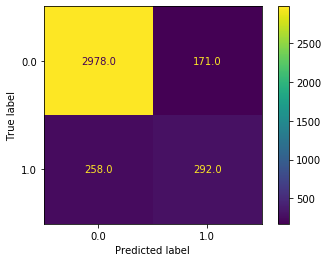

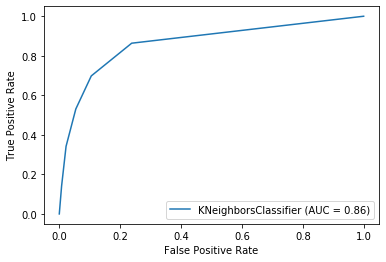

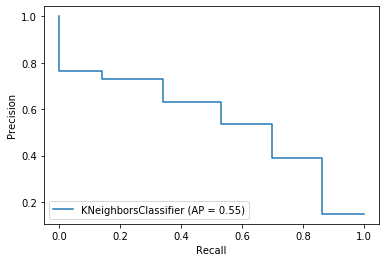

In [139]:
visualize(model2)

In [140]:
# KNN + VIF + OT

### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)



## includes only the relevant features.
train_out.head()

Iteration no.
1
[8.343964353258738, 8.691452379871954, 5.364897104421846, 5.17350194106008, 33.18321196173075, 23.56947083219483, 2.1344998030862894, 3.9350486327858296, 1.1633922557389322, 1.2232877866622758, 6.074965620886722, 6.519552224628663, 3.1918651963109594, 2.6485628446371514, 2.162250231396192, 1.2246258612349838, 1.296054990315913]
Max VIF is for variable no.:
4
Iteration no.
2
[8.136674347102337, 8.651864793691765, 5.357360429415675, 5.17225999718749, 6.2724860626266645, 2.130109648952699, 3.9344239166815997, 1.163350421967785, 1.1995039759246469, 5.6737039161755645, 6.287727444920818, 3.164219414951542, 2.637172010608437, 2.16035185598989, 1.202480430931603, 1.293083857142282]
Max VIF is for variable no.:
1
Iteration no.
3
[2.348908282347942, 5.355772243979883, 5.1703443563075835, 6.186738430301238, 2.1300183045147225, 3.923282644379343, 1.1618203895453292, 1.1979614182560476, 5.669535324567551, 6.286834615326176, 3.164172789128151, 2.633457315454364, 2.1586946560222198, 

Administrative  Informational  Informational_Duration  BounceRates  \
0             0.0            0.0                     0.0     0.005572   
1             0.0            0.0                     0.0     0.000000   
2             0.0            0.0                     0.0     0.007025   
3             0.0            0.0                     0.0     0.006799   
4             0.0            0.0                     0.0     0.020000   

   ExitRates  PageValues  SpecialDay  Month  Browser  Region  TrafficType  \
0   0.049657         0.0         0.0    2.0      1.0     1.0          1.0   
1   0.100000         0.0         0.0    2.0      2.0     1.0          2.0   
2   0.049354         0.0         0.0    2.0      1.0     9.0          3.0   
3   0.048224         0.0         0.0    2.0      2.0     2.0          4.0   
4   0.050000         0.0         0.0    2.0      3.0     1.0          4.0   

   VisitorType  Weekend  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      1.0

Accuracy Score Train:  91.3799096280848 %
Accuracy Score Test :  88.51040821843742 %
************************************************************
Precision Train:  76.19453924914676 %
Precision Test :  62.327416173570015 %
************************************************************
Recall Train:  65.75846833578792 %
Recall Test :  57.45454545454546 %
************************************************************
F1 Train:  70.59288537549406 %
F1 Test :  59.7918637653737 %
************************************************************
ROC_AUC Train:  80.9611810948842 %
ROC_AUC Test :  75.6945639308294 %
************************************************************
RMSE Train:  0.2935999041538534
RMSE Test :  0.33896300360898657
************************************************************
Confusion Matrix Train: 
 [[6994  279]
 [ 465  893]]
Confusion Matrix Test : 
 [[2958  191]
 [ 234  316]]
************************************************************
Classification Report Train: 
         

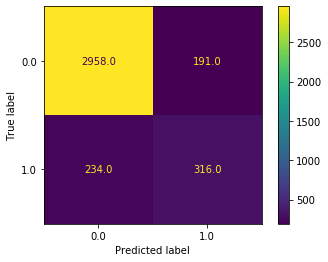

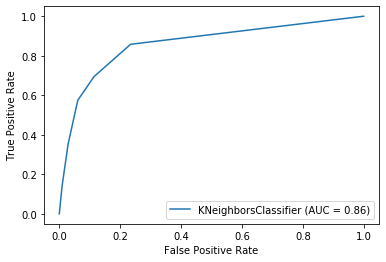

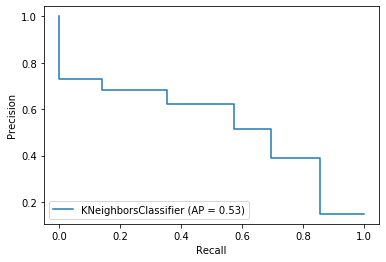

In [141]:
X = train_out.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
model4.fit(X_train,y_train)

evaluate(model4)

visualize(model4)

In [142]:
# KNN + SMOTE + OT

In [143]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

In [144]:
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train))

Before
 [7273 1358]
After
 [7273 7273]


In [145]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier()
model6.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [146]:
evaluate(model6)

Accuracy Score Train:  92.89839131032586 %
Accuracy Score Test :  81.72479048391456 %
************************************************************
Precision Train:  87.84570596797671 %
Precision Test :  43.66197183098591 %
************************************************************
Recall Train:  99.57376598377562 %
Recall Test :  78.9090909090909 %
************************************************************
F1 Train:  93.34278533221628 %
F1 Test :  56.21761658031088 %
************************************************************
ROC_AUC Train:  92.89839131032586 %
ROC_AUC Test :  80.56283380005196 %
************************************************************
RMSE Train:  0.26648843670362393
RMSE Test :  0.4274951405113914
************************************************************
Confusion Matrix Train: 
 [[6271 1002]
 [  31 7242]]
Confusion Matrix Test : 
 [[2589  560]
 [ 116  434]]
************************************************************
Classification Report Train: 
       

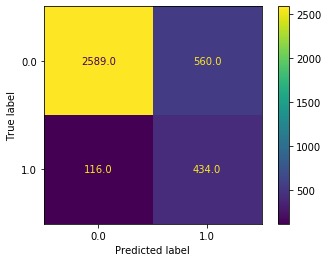

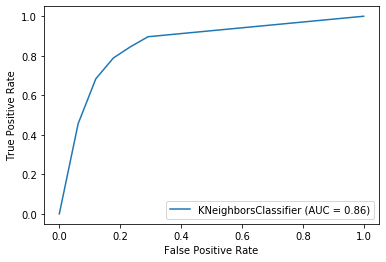

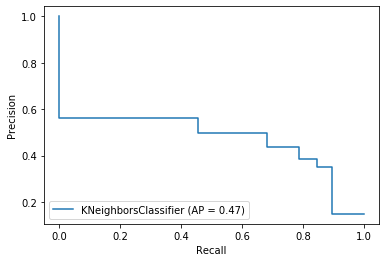

In [147]:
visualize(model6)

In [148]:
# RF + SMote + OT + HyperParameterTuning

In [149]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model9 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model4 = model9.fit(X_train,y_train)

In [150]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {}  
  
GS_svm = GridSearchCV(model4, param_grid, refit = True, verbose = 3,cv=3,scoring='roc_auc') 
  
# fitting the model for grid search 
GS_svm.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.924, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... , score=0.931, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .................................... , score=0.934, total=   1.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=30,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=70, n_jobs=1,
                                              oob_score=True, random_state=42,
                                        

# Part 4 Decision Tree Classifier

In [151]:
# DT (Base Model)

In [152]:
df_old = pd.read_csv('Online_Shopper_Intention_WOT.csv')
df = df_old.copy()

In [153]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth =  1, min_samples_leaf = 1)
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
evaluate(model1)

Accuracy Score Train:  88.65716602942881 %
Accuracy Score Test :  87.2397945390646 %
************************************************************
Precision Train:  61.21965660153938 %
Precision Test :  55.371900826446286 %
************************************************************
Recall Train:  76.14138438880707 %
Recall Test :  73.0909090909091 %
************************************************************
F1 Train:  67.87003610108303 %
F1 Test :  63.00940438871473 %
************************************************************
ROC_AUC Train:  83.56773605525875 %
ROC_AUC Test :  81.40096423106903 %
************************************************************
RMSE Train:  0.3367912405418406
RMSE Test :  0.3572142978792337
************************************************************
Confusion Matrix Train: 
 [[6618  655]
 [ 324 1034]]
Confusion Matrix Test : 
 [[2825  324]
 [ 148  402]]
************************************************************
Classification Report Train: 
        

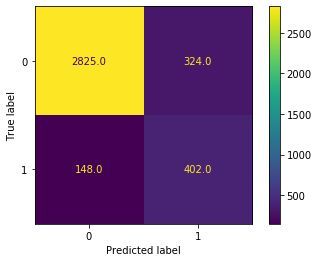

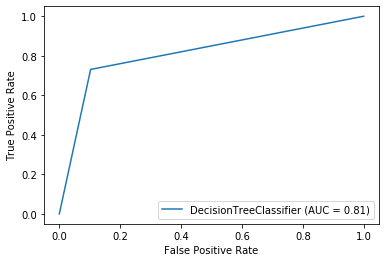

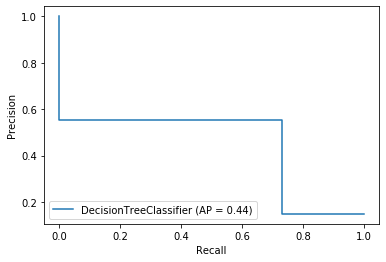

In [155]:
visualize(model1)

In [156]:
# DT + OT

In [157]:
df_old = pd.read_csv('Online_Shopper_Intention_OT.csv')
df_old.drop('Unnamed: 0',axis=1,inplace=True)
df = df_old.copy()

In [158]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion =  'gini', max_depth = 1, min_samples_leaf = 1)
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [159]:
evaluate(model2)

Accuracy Score Train:  88.65716602942881 %
Accuracy Score Test :  87.2397945390646 %
************************************************************
Precision Train:  61.21965660153938 %
Precision Test :  55.371900826446286 %
************************************************************
Recall Train:  76.14138438880707 %
Recall Test :  73.0909090909091 %
************************************************************
F1 Train:  67.87003610108303 %
F1 Test :  63.00940438871473 %
************************************************************
ROC_AUC Train:  83.56773605525875 %
ROC_AUC Test :  81.40096423106903 %
************************************************************
RMSE Train:  0.3367912405418406
RMSE Test :  0.3572142978792337
************************************************************
Confusion Matrix Train: 
 [[6618  655]
 [ 324 1034]]
Confusion Matrix Test : 
 [[2825  324]
 [ 148  402]]
************************************************************
Classification Report Train: 
        

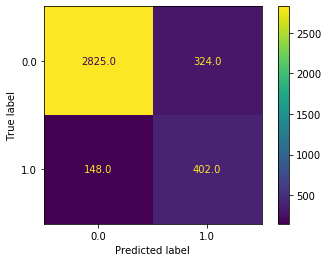

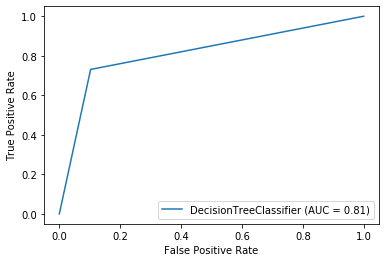

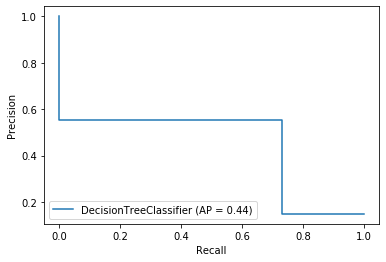

In [160]:
visualize(model2)

In [161]:
# DT + RFE + OT

In [162]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
model = DecisionTreeClassifier(criterion =  'gini', max_depth = 1, min_samples_leaf = 1)
rfe = RFE(model)
model3 = rfe.fit(X_train,y_train)

In [163]:
evaluate(model3)

Accuracy Score Train:  88.65716602942881 %
Accuracy Score Test :  87.2397945390646 %
************************************************************
Precision Train:  61.21965660153938 %
Precision Test :  55.371900826446286 %
************************************************************
Recall Train:  76.14138438880707 %
Recall Test :  73.0909090909091 %
************************************************************
F1 Train:  67.87003610108303 %
F1 Test :  63.00940438871473 %
************************************************************
ROC_AUC Train:  83.56773605525875 %
ROC_AUC Test :  81.40096423106903 %
************************************************************
RMSE Train:  0.3367912405418406
RMSE Test :  0.3572142978792337
************************************************************
Confusion Matrix Train: 
 [[6618  655]
 [ 324 1034]]
Confusion Matrix Test : 
 [[2825  324]
 [ 148  402]]
************************************************************
Classification Report Train: 
        

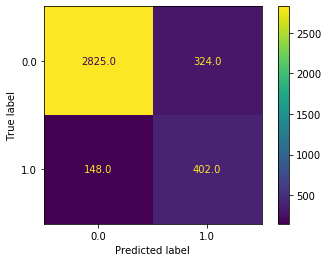

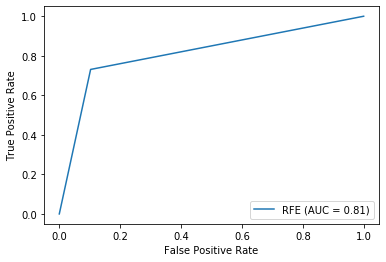

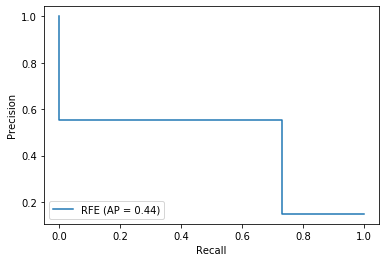

In [164]:
visualize(model3)

In [165]:
# DT + VIF + OT

### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)



## includes only the relevant features.
train_out.head()

Iteration no.
1
[8.343964353258738, 8.691452379871954, 5.364897104421846, 5.17350194106008, 33.18321196173075, 23.56947083219483, 2.1344998030862894, 3.9350486327858296, 1.1633922557389322, 1.2232877866622758, 6.074965620886722, 6.519552224628663, 3.1918651963109594, 2.6485628446371514, 2.162250231396192, 1.2246258612349838, 1.296054990315913]
Max VIF is for variable no.:
4
Iteration no.
2
[8.136674347102337, 8.651864793691765, 5.357360429415675, 5.17225999718749, 6.2724860626266645, 2.130109648952699, 3.9344239166815997, 1.163350421967785, 1.1995039759246469, 5.6737039161755645, 6.287727444920818, 3.164219414951542, 2.637172010608437, 2.16035185598989, 1.202480430931603, 1.293083857142282]
Max VIF is for variable no.:
1
Iteration no.
3
[2.348908282347942, 5.355772243979883, 5.1703443563075835, 6.186738430301238, 2.1300183045147225, 3.923282644379343, 1.1618203895453292, 1.1979614182560476, 5.669535324567551, 6.286834615326176, 3.164172789128151, 2.633457315454364, 2.1586946560222198, 

Administrative  Informational  Informational_Duration  BounceRates  \
0             0.0            0.0                     0.0     0.005572   
1             0.0            0.0                     0.0     0.000000   
2             0.0            0.0                     0.0     0.007025   
3             0.0            0.0                     0.0     0.006799   
4             0.0            0.0                     0.0     0.020000   

   ExitRates  PageValues  SpecialDay  Month  Browser  Region  TrafficType  \
0   0.049657         0.0         0.0    2.0      1.0     1.0          1.0   
1   0.100000         0.0         0.0    2.0      2.0     1.0          2.0   
2   0.049354         0.0         0.0    2.0      1.0     9.0          3.0   
3   0.048224         0.0         0.0    2.0      2.0     2.0          4.0   
4   0.050000         0.0         0.0    2.0      3.0     1.0          4.0   

   VisitorType  Weekend  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      1.0

Accuracy Score Train:  88.65716602942881 %
Accuracy Score Test :  87.2397945390646 %
************************************************************
Precision Train:  61.21965660153938 %
Precision Test :  55.371900826446286 %
************************************************************
Recall Train:  76.14138438880707 %
Recall Test :  73.0909090909091 %
************************************************************
F1 Train:  67.87003610108303 %
F1 Test :  63.00940438871473 %
************************************************************
ROC_AUC Train:  83.56773605525875 %
ROC_AUC Test :  81.40096423106903 %
************************************************************
RMSE Train:  0.3367912405418406
RMSE Test :  0.3572142978792337
************************************************************
Confusion Matrix Train: 
 [[6618  655]
 [ 324 1034]]
Confusion Matrix Test : 
 [[2825  324]
 [ 148  402]]
************************************************************
Classification Report Train: 
        

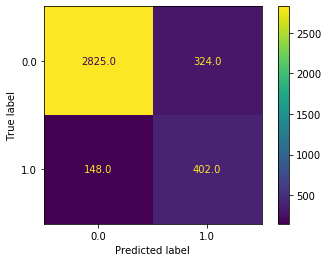

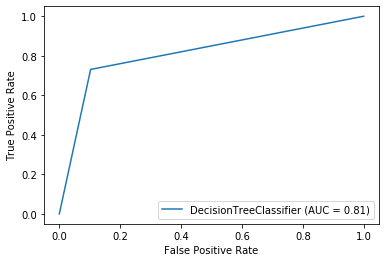

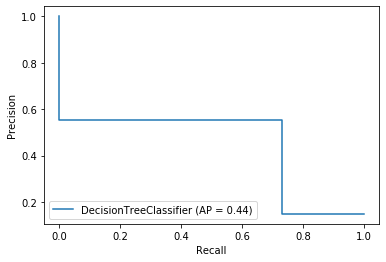

In [166]:
X = train_out.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion =  'gini', max_depth = 1, min_samples_leaf = 1)
model4.fit(X_train,y_train)

evaluate(model4)

visualize(model4)

In [ ]:
# DT + OT + RFE + SMOTE

In [167]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = DecisionTreeClassifier(criterion =  'gini', max_depth = 1, min_samples_leaf = 1)
rfe = RFE(model)
model5 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149  550]


In [168]:
evaluate(model5)

Accuracy Score Train:  85.65928777670837 %
Accuracy Score Test :  86.78021086780211 %
************************************************************
Precision Train:  88.0781089414183 %
Precision Test :  53.71498172959805 %
************************************************************
Recall Train:  82.48315688161694 %
Recall Test :  80.18181818181817 %
************************************************************
F1 Train:  85.18886679920477 %
F1 Test :  64.33260393873086 %
************************************************************
ROC_AUC Train:  85.65928777670835 %
ROC_AUC Test :  84.05724761107423 %
************************************************************
RMSE Train:  0.378691328436388
RMSE Test :  0.36359027946574546
************************************************************
Confusion Matrix Train: 
 [[6461  812]
 [1274 5999]]
Confusion Matrix Test : 
 [[2769  380]
 [ 109  441]]
************************************************************
Classification Report Train: 
        

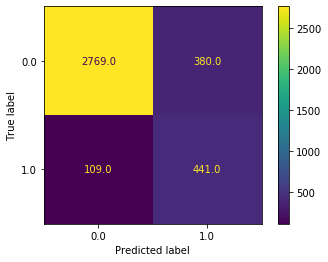

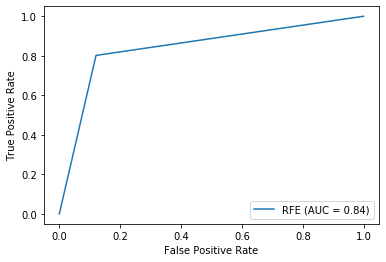

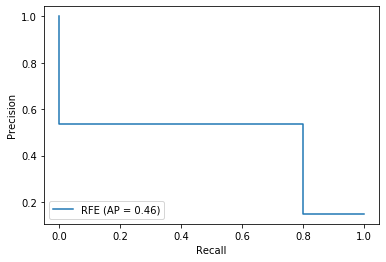

In [169]:
visualize(model5)

In [170]:
# DT + SMOTE + OT

In [171]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

In [172]:
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train))

Before
 [7273 1358]
After
 [7273 7273]


In [173]:
from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier(criterion =  'gini', max_depth = 1, min_samples_leaf = 1)
model6.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [174]:
evaluate(model6)

Accuracy Score Train:  85.37054860442733 %
Accuracy Score Test :  86.78021086780211 %
************************************************************
Precision Train:  88.00413650465356 %
Precision Test :  53.71498172959805 %
************************************************************
Recall Train:  81.90567853705485 %
Recall Test :  80.18181818181817 %
************************************************************
F1 Train:  84.84546360917248 %
F1 Test :  64.33260393873086 %
************************************************************
ROC_AUC Train:  85.37054860442733 %
ROC_AUC Test :  84.05724761107423 %
************************************************************
RMSE Train:  0.38248465845799184
RMSE Test :  0.36359027946574546
************************************************************
Confusion Matrix Train: 
 [[6461  812]
 [1316 5957]]
Confusion Matrix Test : 
 [[2769  380]
 [ 109  441]]
************************************************************
Classification Report Train: 
     

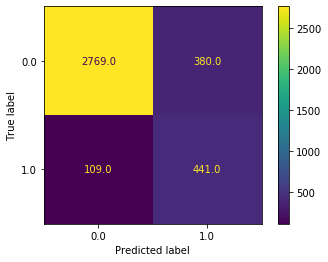

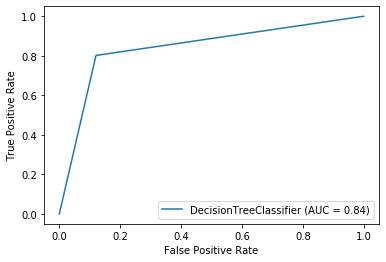

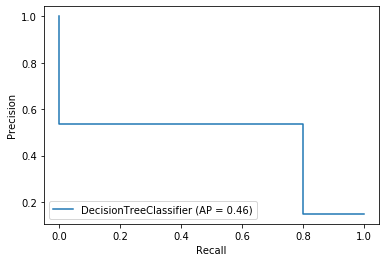

In [175]:
visualize(model6)

In [177]:
# DT + PCA + OT + SMOTE

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = DecisionTreeClassifier(criterion =  'gini', max_depth = 1, min_samples_leaf = 1)
pca = PCA(model)
model8 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149  550]


In [178]:
evaluate(model8)

Accuracy Score Train:  85.88615426921491 %
Accuracy Score Test :  86.78021086780211 %
************************************************************
Precision Train:  88.13559322033898 %
Precision Test :  53.71498172959805 %
************************************************************
Recall Train:  82.93688986663 %
Recall Test :  80.18181818181817 %
************************************************************
F1 Train:  85.45725012396402 %
F1 Test :  64.33260393873086 %
************************************************************
ROC_AUC Train:  85.88615426921491 %
ROC_AUC Test :  84.05724761107423 %
************************************************************
RMSE Train:  0.3756839859614074
RMSE Test :  0.36359027946574546
************************************************************
Confusion Matrix Train: 
 [[6461  812]
 [1241 6032]]
Confusion Matrix Test : 
 [[2769  380]
 [ 109  441]]
************************************************************
Classification Report Train: 
         

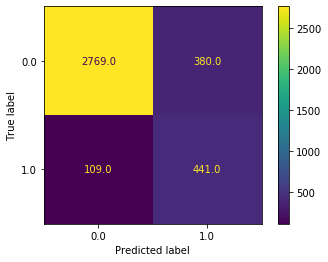

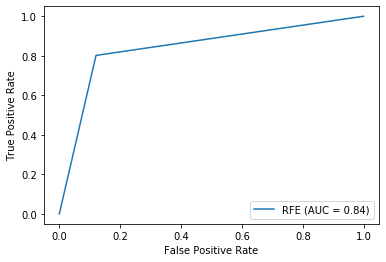

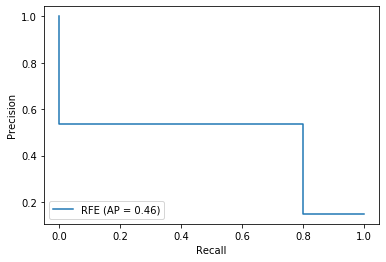

In [179]:
visualize(model8)

In [180]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)

In [181]:
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y))
smt = SMOTE()
X, y  = smt.fit_sample(X, y)
print('After\n',np.bincount(y))

Before
 [10422  1908]
After
 [10422 10422]


***/
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=0)
dt_params={'max_depth':np.arange(1,200),'min_samples_leaf':np.arange(1,100),'criterion':['gini','gini']}
GS_dt=GridSearchCV(dt,dt_params,cv=3,scoring='roc_auc')
GS_dt.fit(X,y)
GS_dt.best_params_
/***

# Part 5: Support Vector Machine

In [184]:
# SVM (Base Model)

In [185]:
df_old = pd.read_csv('Online_Shopper_Intention_WOT.csv')
df = df_old.copy()

In [186]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.svm import SVC
model1 = SVC(C = 0.1, gamma = 'auto', kernel = 'rbf')
model1.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
evaluate(model1)

Accuracy Score Train:  84.26601784266018 %
Accuracy Score Test :  85.13111651797783 %
************************************************************
Precision Train:  0.0 %
Precision Test :  0.0 %
************************************************************
Recall Train:  0.0 %
Recall Test :  0.0 %
************************************************************
F1 Train:  0.0 %
F1 Test :  0.0 %
************************************************************
ROC_AUC Train:  50.0 %
ROC_AUC Test :  50.0 %
************************************************************
RMSE Train:  0.3966608394754872
RMSE Test :  0.38560191236587726
************************************************************
Confusion Matrix Train: 
 [[7273    0]
 [1358    0]]
Confusion Matrix Test : 
 [[3149    0]
 [ 550    0]]
************************************************************
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      7273
      

C:\Users\Sriteja\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Sriteja\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



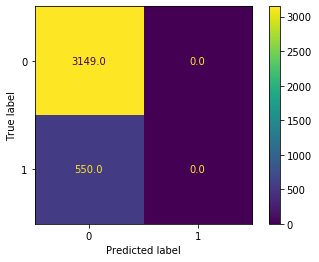

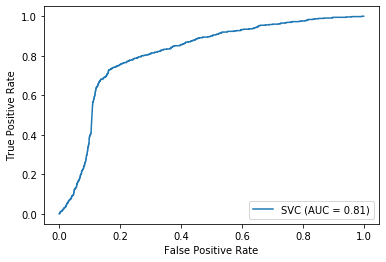

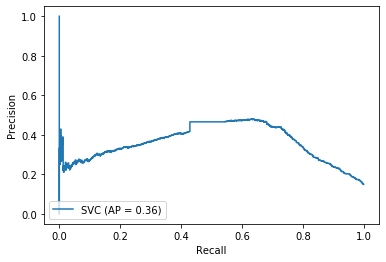

In [188]:
visualize(model1)

In [189]:
# SVM + OT

In [190]:
df_old = pd.read_csv('Online_Shopper_Intention_OT.csv')
df_old.drop('Unnamed: 0',axis=1,inplace=True)
df = df_old.copy()

In [191]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.svm import SVC
model2 = SVC(C = 0.1, gamma =  'auto', kernel = 'rbf')
model2.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [192]:
evaluate(model2)

Accuracy Score Train:  84.28919012860618 %
Accuracy Score Test :  85.15815085158151 %
************************************************************
Precision Train:  100.0 %
Precision Test :  100.0 %
************************************************************
Recall Train:  0.14727540500736377 %
Recall Test :  0.18181818181818182 %
************************************************************
F1 Train:  0.29411764705882354 %
F1 Test :  0.3629764065335753 %
************************************************************
ROC_AUC Train:  50.07363770250368 %
ROC_AUC Test :  50.090909090909086 %
************************************************************
RMSE Train:  0.39636863992240623
RMSE Test :  0.3852512056881651
************************************************************
Confusion Matrix Train: 
 [[7273    0]
 [1356    2]]
Confusion Matrix Test : 
 [[3149    0]
 [ 549    1]]
************************************************************
Classification Report Train: 
               precisi

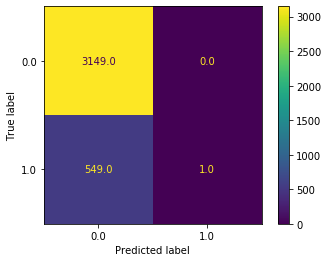

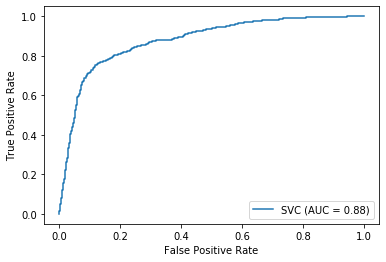

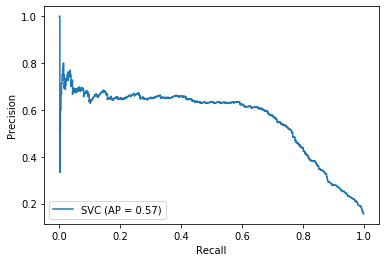

In [193]:
visualize(model2)

In [194]:
# SVM + RFE + OT

In [195]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
model = SVC(C = 0.1, gamma =  'auto', kernel = 'rbf')
rfe = RFE(model)
model3 = rfe.fit(X_train,y_train)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [ ]:
evaluate(model3)

In [ ]:
visualize(model3)

In [196]:
# SVM + VIF + OT

### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)



## includes only the relevant features.
train_out.head()

Iteration no.
1
[8.343964353258738, 8.691452379871954, 5.364897104421846, 5.17350194106008, 33.18321196173075, 23.56947083219483, 2.1344998030862894, 3.9350486327858296, 1.1633922557389322, 1.2232877866622758, 6.074965620886722, 6.519552224628663, 3.1918651963109594, 2.6485628446371514, 2.162250231396192, 1.2246258612349838, 1.296054990315913]
Max VIF is for variable no.:
4
Iteration no.
2
[8.136674347102337, 8.651864793691765, 5.357360429415675, 5.17225999718749, 6.2724860626266645, 2.130109648952699, 3.9344239166815997, 1.163350421967785, 1.1995039759246469, 5.6737039161755645, 6.287727444920818, 3.164219414951542, 2.637172010608437, 2.16035185598989, 1.202480430931603, 1.293083857142282]
Max VIF is for variable no.:
1
Iteration no.
3
[2.348908282347942, 5.355772243979883, 5.1703443563075835, 6.186738430301238, 2.1300183045147225, 3.923282644379343, 1.1618203895453292, 1.1979614182560476, 5.669535324567551, 6.286834615326176, 3.164172789128151, 2.633457315454364, 2.1586946560222198, 

Administrative  Informational  Informational_Duration  BounceRates  \
0             0.0            0.0                     0.0     0.005572   
1             0.0            0.0                     0.0     0.000000   
2             0.0            0.0                     0.0     0.007025   
3             0.0            0.0                     0.0     0.006799   
4             0.0            0.0                     0.0     0.020000   

   ExitRates  PageValues  SpecialDay  Month  Browser  Region  TrafficType  \
0   0.049657         0.0         0.0    2.0      1.0     1.0          1.0   
1   0.100000         0.0         0.0    2.0      2.0     1.0          2.0   
2   0.049354         0.0         0.0    2.0      1.0     9.0          3.0   
3   0.048224         0.0         0.0    2.0      2.0     2.0          4.0   
4   0.050000         0.0         0.0    2.0      3.0     1.0          4.0   

   VisitorType  Weekend  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      1.0

Accuracy Score Train:  85.99235314563781 %
Accuracy Score Test :  85.67180319005136 %
************************************************************
Precision Train:  85.64593301435407 %
Precision Test :  62.19512195121951 %
************************************************************
Recall Train:  13.181148748159059 %
Recall Test :  9.272727272727273 %
************************************************************
F1 Train:  22.84620293554563 %
F1 Test :  16.139240506329113 %
************************************************************
ROC_AUC Train:  56.3843321081645 %
ROC_AUC Test :  54.14414388406132 %
************************************************************
RMSE Train:  0.37426791011736743
RMSE Test :  0.37852604679134877
************************************************************
Confusion Matrix Train: 
 [[7243   30]
 [1179  179]]
Confusion Matrix Test : 
 [[3118   31]
 [ 499   51]]
************************************************************
Classification Report Train: 
    

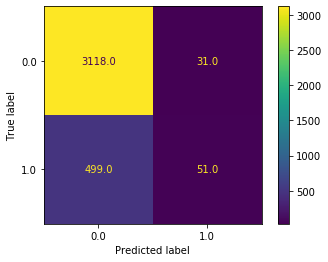

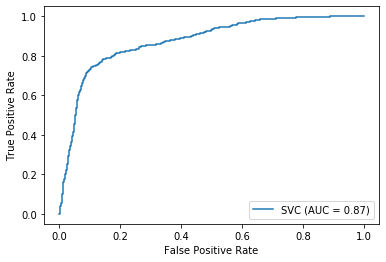

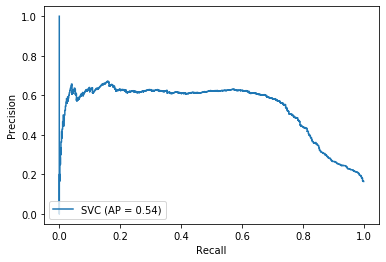

In [197]:
X = train_out.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.svm import SVC
model4 = SVC(C = 0.1, gamma =  'auto', kernel = 'rbf')
model4.fit(X_train,y_train)

evaluate(model4)

visualize(model4)

In [198]:
# SVM + OT + RFE + SMOTE

In [199]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
X_test, y_test = smt.fit_sample(X_test, y_test)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = SVC(C = 0.1, gamma =  'auto', kernel = 'rbf')
rfe = RFE(model)
model5 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149 3149]


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [ ]:
evaluate(model5)

In [ ]:
visualize(model5)

In [200]:
# SVM + SMOTE + OT

In [201]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

In [202]:
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train))

Before
 [7273 1358]
After
 [7273 7273]


In [203]:
from sklearn.svm import SVC
model6 = SVC(C = 0.1, gamma =  'auto', kernel = 'rbf')
model6.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [204]:
evaluate(model6)

Accuracy Score Train:  85.74178468307439 %
Accuracy Score Test :  81.72479048391456 %
************************************************************
Precision Train:  83.45129326984943 %
Precision Test :  44.11214953271028 %
************************************************************
Recall Train:  89.16540629726384 %
Recall Test :  85.81818181818181 %
************************************************************
F1 Train:  86.21377293273066 %
F1 Test :  58.271604938271615 %
************************************************************
ROC_AUC Train:  85.74178468307439 %
ROC_AUC Test :  83.41401310661394 %
************************************************************
RMSE Train:  0.3776005206157112
RMSE Test :  0.4274951405113914
************************************************************
Confusion Matrix Train: 
 [[5987 1286]
 [ 788 6485]]
Confusion Matrix Test : 
 [[2551  598]
 [  78  472]]
************************************************************
Classification Report Train: 
      

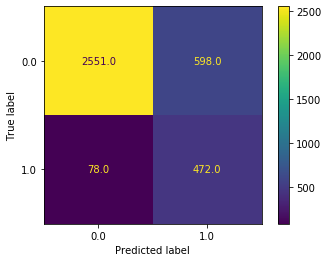

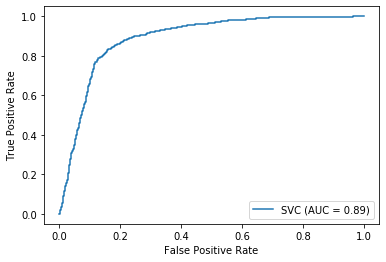

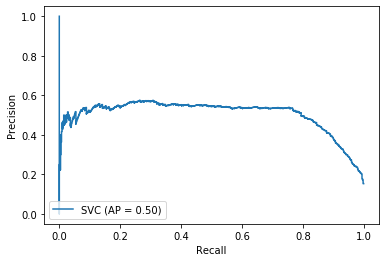

In [205]:
visualize(model6)

In [207]:
# SVM + PCA + OT + SMOTE

from sklearn.decomposition import PCA
from sklearn.svm import SVC
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = SVC(C = 0.1, gamma =  'auto', kernel = 'rbf')
pca = PCA(model)
model8 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149  550]


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [ ]:
evaluate(model8)

In [ ]:
visualize(model8)

In [208]:
# RF + SMote + OT + HyperParameterTuning

In [209]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model9 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model4 = model9.fit(X_train,y_train)

In [210]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {}  
  
GS_svm = GridSearchCV(model4, param_grid, refit = True, verbose = 3,cv=3,scoring='roc_auc') 
  
# fitting the model for grid search 
GS_svm.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.924, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .................................... , score=0.931, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] .................................... , score=0.934, total=   1.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=30,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=70, n_jobs=1,
                                              oob_score=True, random_state=42,
                                        

# Part 6: Gaussian Naive Bayes

In [212]:
# GNB (Base Model)

In [213]:
df_old = pd.read_csv('Online_Shopper_Intention_WOT.csv')
df = df_old.copy()

In [214]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.naive_bayes import GaussianNB as GNB
model1 = GNB()
model1.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [215]:
evaluate(model1)

Accuracy Score Train:  83.15374811725177 %
Accuracy Score Test :  84.48229251148959 %
************************************************************
Precision Train:  47.08029197080292 %
Precision Test :  48.21958456973294 %
************************************************************
Recall Train:  56.995581737849776 %
Recall Test :  59.09090909090909 %
************************************************************
F1 Train:  51.56562291805463 %
F1 Test :  53.10457516339869 %
************************************************************
ROC_AUC Train:  72.51676515738907 %
ROC_AUC Test :  74.004012817922 %
************************************************************
RMSE Train:  0.4104418580353158
RMSE Test :  0.39392521483792337
************************************************************
Confusion Matrix Train: 
 [[6403  870]
 [ 584  774]]
Confusion Matrix Test : 
 [[2800  349]
 [ 225  325]]
************************************************************
Classification Report Train: 
       

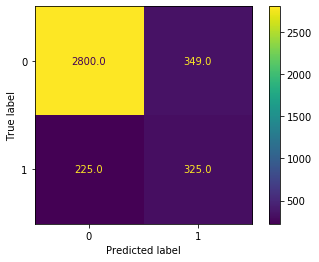

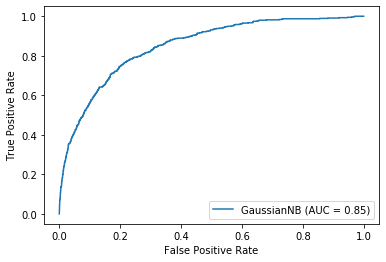

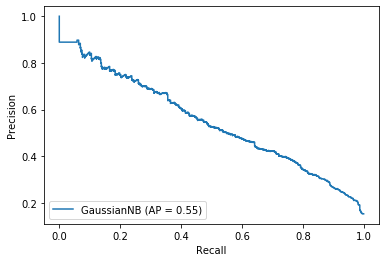

In [216]:
visualize(model1)

In [217]:
# GNB + OT

In [218]:
df_old = pd.read_csv('Online_Shopper_Intention_OT.csv')
df_old.drop('Unnamed: 0',axis=1,inplace=True)
df = df_old.copy()

In [219]:
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.naive_bayes import GaussianNB as GNB
model2 = GNB()
model2.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [220]:
evaluate(model2)

Accuracy Score Train:  82.23844282238443 %
Accuracy Score Test :  83.04947283049474 %
************************************************************
Precision Train:  45.17906336088154 %
Precision Test :  44.98044328552803 %
************************************************************
Recall Train:  60.382916053019144 %
Recall Test :  62.727272727272734 %
************************************************************
F1 Train:  51.68610148124802 %
F1 Test :  52.39179954441915 %
************************************************************
ROC_AUC Train:  73.3510895403278 %
ROC_AUC Test :  74.66309650971448 %
************************************************************
RMSE Train:  0.42144462480396605
RMSE Test :  0.4117101792463392
************************************************************
Confusion Matrix Train: 
 [[6278  995]
 [ 538  820]]
Confusion Matrix Test : 
 [[2727  422]
 [ 205  345]]
************************************************************
Classification Report Train: 
     

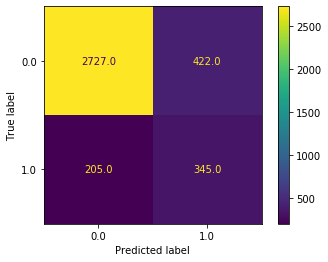

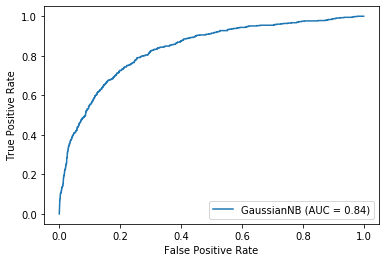

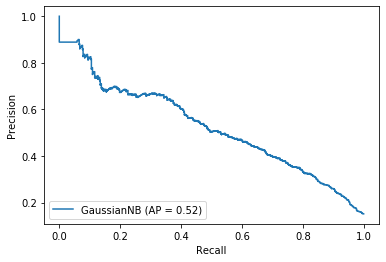

In [221]:
visualize(model2)

In [222]:
# GNB + RFE + OT

In [226]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB as GNB
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
model = GNB()
rfe = RFE(model)
model3 = rfe.fit(X_train,y_train)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [227]:
evaluate(model3)

Accuracy Score Train:  88.65716602942881 %
Accuracy Score Test :  87.2397945390646 %
************************************************************
Precision Train:  61.21965660153938 %
Precision Test :  55.371900826446286 %
************************************************************
Recall Train:  76.14138438880707 %
Recall Test :  73.0909090909091 %
************************************************************
F1 Train:  67.87003610108303 %
F1 Test :  63.00940438871473 %
************************************************************
ROC_AUC Train:  83.56773605525875 %
ROC_AUC Test :  81.40096423106903 %
************************************************************
RMSE Train:  0.3367912405418406
RMSE Test :  0.3572142978792337
************************************************************
Confusion Matrix Train: 
 [[6618  655]
 [ 324 1034]]
Confusion Matrix Test : 
 [[2825  324]
 [ 148  402]]
************************************************************
Classification Report Train: 
        

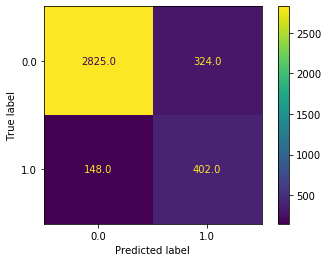

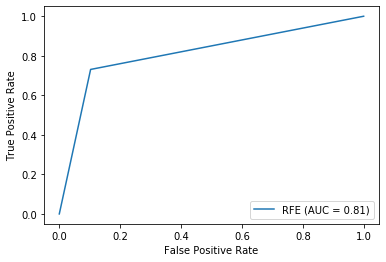

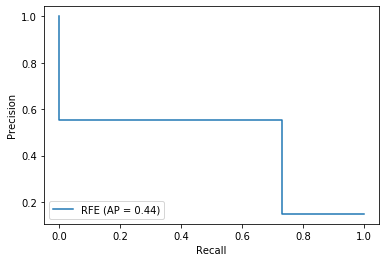

In [228]:
visualize(model3)

In [229]:
# GNB + VIF + OT

### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)



## includes only the relevant features.
train_out.head()

Iteration no.
1
[8.343964353258738, 8.691452379871954, 5.364897104421846, 5.17350194106008, 33.18321196173075, 23.56947083219483, 2.1344998030862894, 3.9350486327858296, 1.1633922557389322, 1.2232877866622758, 6.074965620886722, 6.519552224628663, 3.1918651963109594, 2.6485628446371514, 2.162250231396192, 1.2246258612349838, 1.296054990315913]
Max VIF is for variable no.:
4
Iteration no.
2
[8.136674347102337, 8.651864793691765, 5.357360429415675, 5.17225999718749, 6.2724860626266645, 2.130109648952699, 3.9344239166815997, 1.163350421967785, 1.1995039759246469, 5.6737039161755645, 6.287727444920818, 3.164219414951542, 2.637172010608437, 2.16035185598989, 1.202480430931603, 1.293083857142282]
Max VIF is for variable no.:
1
Iteration no.
3
[2.348908282347942, 5.355772243979883, 5.1703443563075835, 6.186738430301238, 2.1300183045147225, 3.923282644379343, 1.1618203895453292, 1.1979614182560476, 5.669535324567551, 6.286834615326176, 3.164172789128151, 2.633457315454364, 2.1586946560222198, 

Administrative  Informational  Informational_Duration  BounceRates  \
0             0.0            0.0                     0.0     0.005572   
1             0.0            0.0                     0.0     0.000000   
2             0.0            0.0                     0.0     0.007025   
3             0.0            0.0                     0.0     0.006799   
4             0.0            0.0                     0.0     0.020000   

   ExitRates  PageValues  SpecialDay  Month  Browser  Region  TrafficType  \
0   0.049657         0.0         0.0    2.0      1.0     1.0          1.0   
1   0.100000         0.0         0.0    2.0      2.0     1.0          2.0   
2   0.049354         0.0         0.0    2.0      1.0     9.0          3.0   
3   0.048224         0.0         0.0    2.0      2.0     2.0          4.0   
4   0.050000         0.0         0.0    2.0      3.0     1.0          4.0   

   VisitorType  Weekend  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      1.0

Accuracy Score Train:  84.13857026995714 %
Accuracy Score Test :  85.21221951878886 %
************************************************************
Precision Train:  49.62199312714777 %
Precision Test :  50.25125628140703 %
************************************************************
Recall Train:  53.166421207658324 %
Recall Test :  54.54545454545454 %
************************************************************
F1 Train:  51.33309633842873 %
F1 Test :  52.310374891020054 %
************************************************************
ROC_AUC Train:  71.5440245733053 %
ROC_AUC Test :  72.55694448454054 %
************************************************************
RMSE Train:  0.3982641049610531
RMSE Test :  0.3845488328055507
************************************************************
Confusion Matrix Train: 
 [[6540  733]
 [ 636  722]]
Confusion Matrix Test : 
 [[2852  297]
 [ 250  300]]
************************************************************
Classification Report Train: 
      

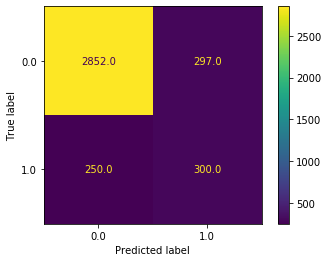

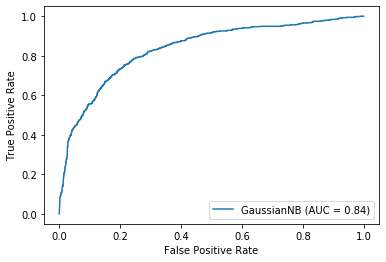

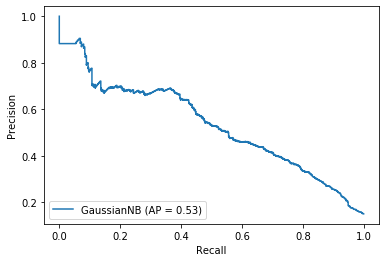

In [230]:
X = train_out.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.naive_bayes import GaussianNB as GNB
model4 = GNB()
model4.fit(X_train,y_train)

evaluate(model4)

visualize(model4)

In [231]:
# GNB + OT + RFE + SMOTE

In [232]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB as GNB
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
X_test, y_test = smt.fit_sample(X_test, y_test)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = GNB()
rfe = RFE(model)
model5 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149 3149]


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [233]:
evaluate(model5)

Accuracy Score Train:  85.58366561253953 %
Accuracy Score Test :  85.1063829787234 %
************************************************************
Precision Train:  88.05882352941177 %
Precision Test :  87.20969370582296 %
************************************************************
Recall Train:  82.33191255327925 %
Recall Test :  82.28008891711654 %
************************************************************
F1 Train:  85.09912598593051 %
F1 Test :  84.67320261437908 %
************************************************************
ROC_AUC Train:  85.58366561253953 %
ROC_AUC Test :  85.10638297872342 %
************************************************************
RMSE Train:  0.3796884826731049
RMSE Test :  0.38592249249397986
************************************************************
Confusion Matrix Train: 
 [[6461  812]
 [1285 5988]]
Confusion Matrix Test : 
 [[2769  380]
 [ 558 2591]]
************************************************************
Classification Report Train: 
       

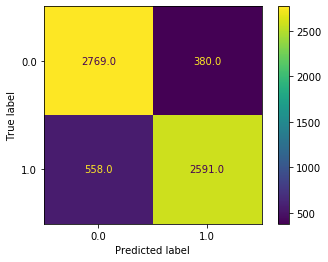

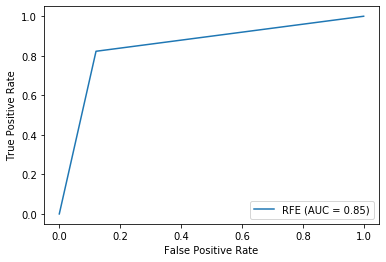

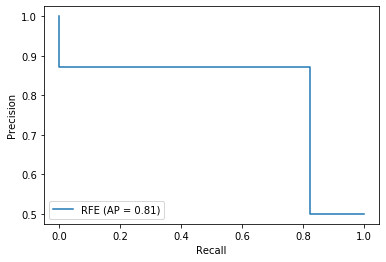

In [234]:
visualize(model5)

In [235]:
# GNB + SMOTE + OT

In [236]:
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

In [237]:
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train))

Before
 [7273 1358]
After
 [7273 7273]


In [238]:
from sklearn.naive_bayes import GaussianNB as GNB
model6 = GNB()
model6.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [239]:
evaluate(model6)

Accuracy Score Train:  76.02777395847656 %
Accuracy Score Test :  71.12733171127331 %
************************************************************
Precision Train:  73.30132939438701 %
Precision Test :  31.47353361945637 %
************************************************************
Recall Train:  81.87817956826619 %
Recall Test :  80.0 %
************************************************************
F1 Train:  77.35273105150354 %
F1 Test :  45.17453798767967 %
************************************************************
ROC_AUC Train:  76.02777395847656 %
ROC_AUC Test :  74.78882184820579 %
************************************************************
RMSE Train:  0.48961439972210213
RMSE Test :  0.5373329348618665
************************************************************
Confusion Matrix Train: 
 [[5104 2169]
 [1318 5955]]
Confusion Matrix Test : 
 [[2191  958]
 [ 110  440]]
************************************************************
Classification Report Train: 
               prec

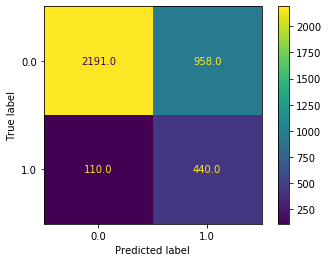

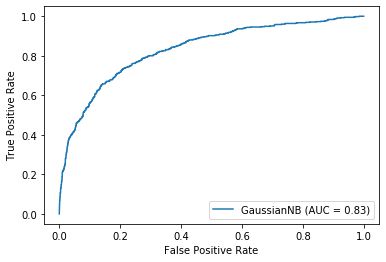

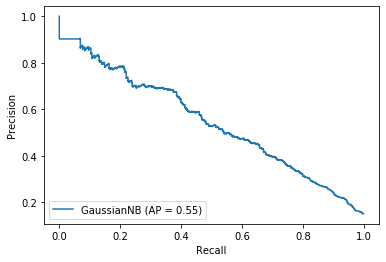

In [240]:
visualize(model6)

In [241]:
# GNB + PCA + OT + SMOTE

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB as GNB
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
X_test, y_test = smt.fit_sample(X_test, y_test)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = GNB()
pca = PCA(model)
model8 = rfe.fit(X_train,y_train)

Before
 [7273 1358] [3149  550]
After
 [7273 7273] [3149 3149]


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [242]:
evaluate(model8)

Accuracy Score Train:  85.24680324487832 %
Accuracy Score Test :  84.83645601778342 %
************************************************************
Precision Train:  87.97215227373722 %
Precision Test :  87.136086662153 %
************************************************************
Recall Train:  81.65818781795683 %
Recall Test :  81.74023499523658 %
************************************************************
F1 Train:  84.69766115231033 %
F1 Test :  84.35195805341635 %
************************************************************
ROC_AUC Train:  85.24680324487832 %
ROC_AUC Test :  84.83645601778342 %
************************************************************
RMSE Train:  0.3840989033455014
RMSE Test :  0.38940395455383575
************************************************************
Confusion Matrix Train: 
 [[6461  812]
 [1334 5939]]
Confusion Matrix Test : 
 [[2769  380]
 [ 575 2574]]
************************************************************
Classification Report Train: 
        

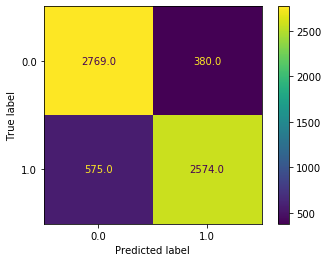

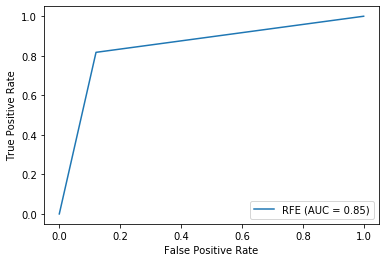

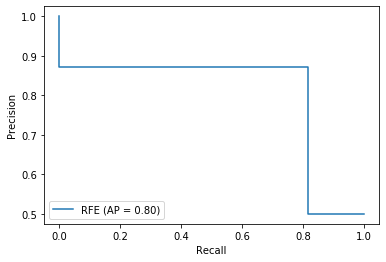

In [243]:
visualize(model8)

In [244]:
# GNB + SMote + OT + HyperParameterTuning

In [245]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model9 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model4 = model9.fit(X_train,y_train)

In [246]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {}  
  
GS_GNB = GridSearchCV(model4, param_grid, refit = True, verbose = 3,cv=3,scoring='roc_auc') 
  
# fitting the model for grid search 
GS_GNB.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.924, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.931, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] .................................... , score=0.934, total=   1.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=30,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=70, n_jobs=1,
                                              oob_score=True, random_state=42,
                                        

Accuracy Score Train:  83.15374811725177 %
Accuracy Score Test :  84.48229251148959 %
************************************************************
Precision Train:  47.08029197080292 %
Precision Test :  48.21958456973294 %
************************************************************
Recall Train:  56.995581737849776 %
Recall Test :  59.09090909090909 %
************************************************************
F1 Train:  51.56562291805463 %
F1 Test :  53.10457516339869 %
************************************************************
ROC_AUC Train:  72.51676515738907 %
ROC_AUC Test :  74.004012817922 %
************************************************************
RMSE Train:  0.4104418580353158
RMSE Test :  0.39392521483792337
************************************************************
Confusion Matrix Train: 
 [[6403  870]
 [ 584  774]]
Confusion Matrix Test : 
 [[2800  349]
 [ 225  325]]
************************************************************
Classification Report Train: 
       

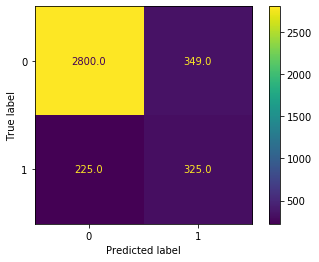

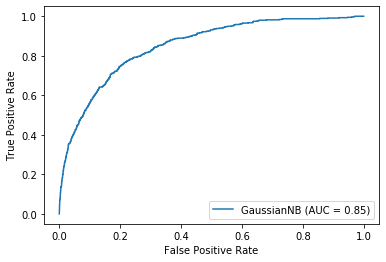

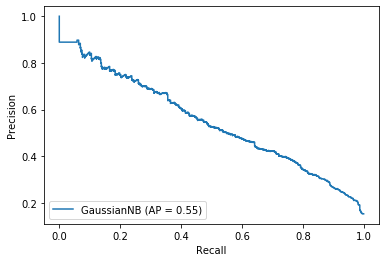

Accuracy Score Train:  82.23844282238443 %
Accuracy Score Test :  83.04947283049474 %
************************************************************
Precision Train:  45.17906336088154 %
Precision Test :  44.98044328552803 %
************************************************************
Recall Train:  60.382916053019144 %
Recall Test :  62.727272727272734 %
************************************************************
F1 Train:  51.68610148124802 %
F1 Test :  52.39179954441915 %
************************************************************
ROC_AUC Train:  73.3510895403278 %
ROC_AUC Test :  74.66309650971448 %
************************************************************
RMSE Train:  0.42144462480396605
RMSE Test :  0.4117101792463392
************************************************************
Confusion Matrix Train: 
 [[6278  995]
 [ 538  820]]
Confusion Matrix Test : 
 [[2727  422]
 [ 205  345]]
************************************************************
Classification Report Train: 
     

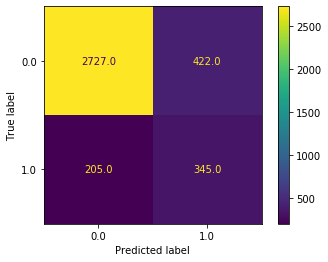

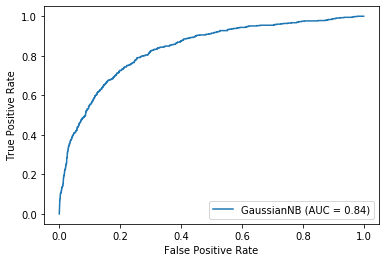

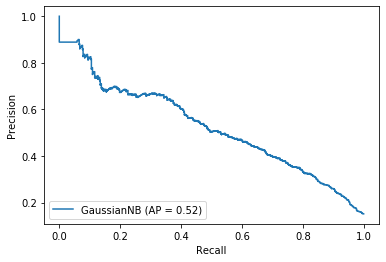

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
def visualize(model):
    from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
    plot_confusion_matrix(model,X_test,y_test,values_format='.1f')
    plot_roc_curve(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plt.show()
    
def evaluate(model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_squared_error,precision_score,f1_score,confusion_matrix,classification_report,recall_score,roc_auc_score
    print('Accuracy Score Train: ',accuracy_score(y_train,y_pred_train)*100,'%')
    print('Accuracy Score Test : ',accuracy_score(y_test,y_pred_test)*100,'%')
    print('*'*60)
    print('Precision Train: ',precision_score(y_train,y_pred_train)*100,'%')
    print('Precision Test : ',precision_score(y_test,y_pred_test)*100,'%')
    print('*'*60)
    print('Recall Train: ',recall_score(y_train,y_pred_train)*100,'%')
    print('Recall Test : ',recall_score(y_test,y_pred_test)*100,'%') 
    print('*'*60)
    print('F1 Train: ',f1_score(y_train,y_pred_train)*100,'%')
    print('F1 Test : ',f1_score(y_test,y_pred_test)*100,'%')   
    print('*'*60)
    print('ROC_AUC Train: ',roc_auc_score(y_train,y_pred_train)*100,'%')
    print('ROC_AUC Test : ',roc_auc_score(y_test,y_pred_test)*100,'%')   
    print('*'*60)
    print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE Test : ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    print('*'*60)
    print('Confusion Matrix Train: \n',confusion_matrix(y_train,y_pred_train))
    print('Confusion Matrix Test : \n',confusion_matrix(y_test,y_pred_test))
    print('*'*60)
    print('Classification Report Train: \n',classification_report(y_train,y_pred_train))
    print('Classification report Test : \n',classification_report(y_test,y_pred_test))

# Part 6: Gaussian Naive Bayes

# GNB (Base Model)

df_old = pd.read_csv('Online_Shopper_Intention_WOT.csv')
df = df_old.copy()

y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.naive_bayes import GaussianNB as GNB
model1 = GNB()
model1.fit(X_train,y_train)

evaluate(model1)

visualize(model1)

# GNB + OT

df_old = pd.read_csv('Online_Shopper_Intention_OT.csv')
df_old.drop('Unnamed: 0',axis=1,inplace=True)
df = df_old.copy()

y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.naive_bayes import GaussianNB as GNB
model2 = GNB()
model2.fit(X_train,y_train)

evaluate(model2)

visualize(model2)

# GNB + RFE + OT

from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB as GNB
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
model = GNB()
rfe = RFE(model)
model3 = rfe.fit(X_train,y_train)

evaluate(model3)

visualize(model3)

# GNB + VIF + OT

### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)



## includes only the relevant features.
train_out.head()

X = train_out.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from sklearn.naive_bayes import GaussianNB as GNB
model4 = GNB()
model4.fit(X_train,y_train)

evaluate(model4)

visualize(model4)

# GNB + OT + RFE + SMOTE

from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB as GNB
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
X_test, y_test = smt.fit_sample(X_test, y_test)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = GNB()
rfe = RFE(model)
model5 = rfe.fit(X_train,y_train)

evaluate(model5)

visualize(model5)

# GNB + SMOTE + OT

df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print('After\n',np.bincount(y_train))

from sklearn.naive_bayes import GaussianNB as GNB
model6 = GNB()
model6.fit(X_train,y_train)

evaluate(model6)

visualize(model6)

# GNB + PCA + OT + SMOTE

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB as GNB
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)
from imblearn.over_sampling import SMOTE
print('Before\n',np.bincount(y_train),np.bincount(y_test))
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
X_test, y_test = smt.fit_sample(X_test, y_test)
print('After\n',np.bincount(y_train),np.bincount(y_test))
model = GNB()
pca = PCA(model)
model8 = rfe.fit(X_train,y_train)

evaluate(model8)

visualize(model8)



# RF + SMote + OT + HyperParameterTuning





from sklearn.model_selection import GridSearchCV
df = pd.read_csv('Online_Shopper_Intention_OT.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
y = df['Revenue']
X = df.drop('Revenue',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.3)

model9 = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = 1,
                            random_state = 42, max_features = None, min_samples_leaf = 30)
model4 = model9.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {}  
  
GS_GNB = GridSearchCV(model4, param_grid, refit = True, verbose = 3,cv=3,scoring='roc_auc') 
  
# fitting the model for grid search 
GS_GNB.fit(X_train, y_train)